## Capstone Project 
FindDefault (Prediction of Credit Card fraud)

### 1) Problem Statement:

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in **two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.**

We have to build a **classification model** to predict whether a transaction is fraudulent or not.


### 2) Data Dictionary

**Column Names**

Time - It contains the seconds elapsed between each transaction and the first transaction in the dataset

V1 to V28 - This features are the principal components obtained with PCA

Amount - Transaction amount

Class - response variable / value contains 0 and 1 (where 0 = Not Fraud and 1 = Fraud transcation) / (Target variable)


### 3) Importing Libraries

In [98]:
import pandas as pd
import numpy as np

## Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

## Preprocessing libraries
from sklearn.preprocessing import MinMaxScaler

## Classifier Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, recall_score, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import confusion_matrix

## Hyperparameter tuning Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### 4) Data Preparation

In [5]:
#Importing the dataset which we will use for the modelling 

df = pd.read_csv('creditcard.csv')

In [7]:
df.head(10)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
6  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055  0.750137   
7 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
8  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   
9  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050 -0.069733   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  
5  0.105915  0.253844  0.081080    3.67      0  
6 -0.257237  0.034507  0.005168    4.99      0  
7 -0.051634 -1.206921 -1.085339   40.80      0  
8 -0.384157  0.011747  0.142404   93.20      0  
9  0.094199  0.246219  0.083076    3.68      0  

[10 rows x 31 columns]

### 5) Understand the Data

In [8]:
# Getting some information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Getting some descriptive statistics about data

df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ... -3.405756e-13 -5.723197e-13 -9.725856e-13  1.464150e-12   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean  -6.987102e-13 -5.617874e-13  3.332082e-12 -3.518874e-12      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [10]:
len(df)

284807

In [11]:
df.shape

(284807, 31)

### 6) Checking Missing Data and Feature Engineering

In [12]:
# checking the count of values in Class column

df.Class.value_counts() 

Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
## checking null values

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
total = df.isnull().sum().sort_values(ascending = False)

percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)

pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

Time  V16  Amount  V28  V27  V26  V25  V24  V23  V22  ...  V10   V9  \
Total     0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
Percent   0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

          V8   V7   V6   V5   V4   V3   V2  Class  
Total    0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  
Percent  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0.0  

[2 rows x 31 columns]

In [16]:
## from above we can see that there are no null values, which is great

In [18]:
## Checking the datatypes of data

df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [19]:
## Checking Duplicates

duplicated_values = df[df.duplicated()]

print(duplicated_values)

            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

In [20]:
## Dropping Duplicate Values

df.drop_duplicates(inplace=True)

In [21]:
# the dupliccates are all removed

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [22]:
df.shape

(283726, 31)

### 7) Exploratory Data Analysis (EDA)

In [24]:
## Considering 'Class' column as a target varaible

df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [25]:
## checking for Fraud and No Fraud transaction in percentage

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [26]:
## we can see that there is Frauds percentage is 0.17% and No Frauds are 99.83%

In [27]:
## Lets Visualize and Analysze all the features of the Data

report = sv.analyze(df, target_feat="Class")

                                             |                                             | [  0%]   00:00 ->…


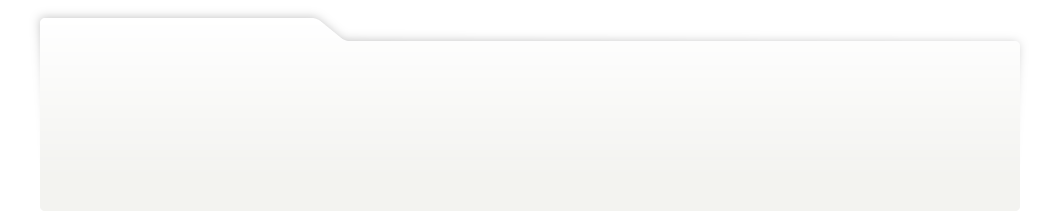
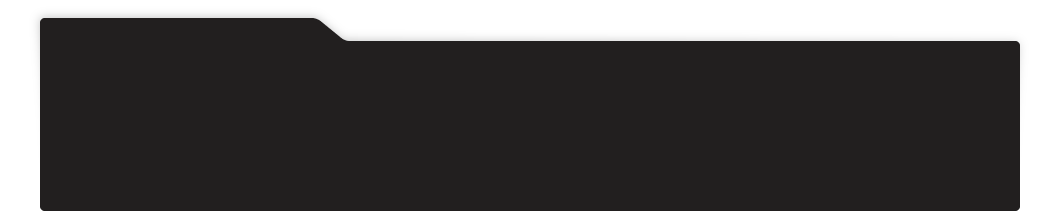
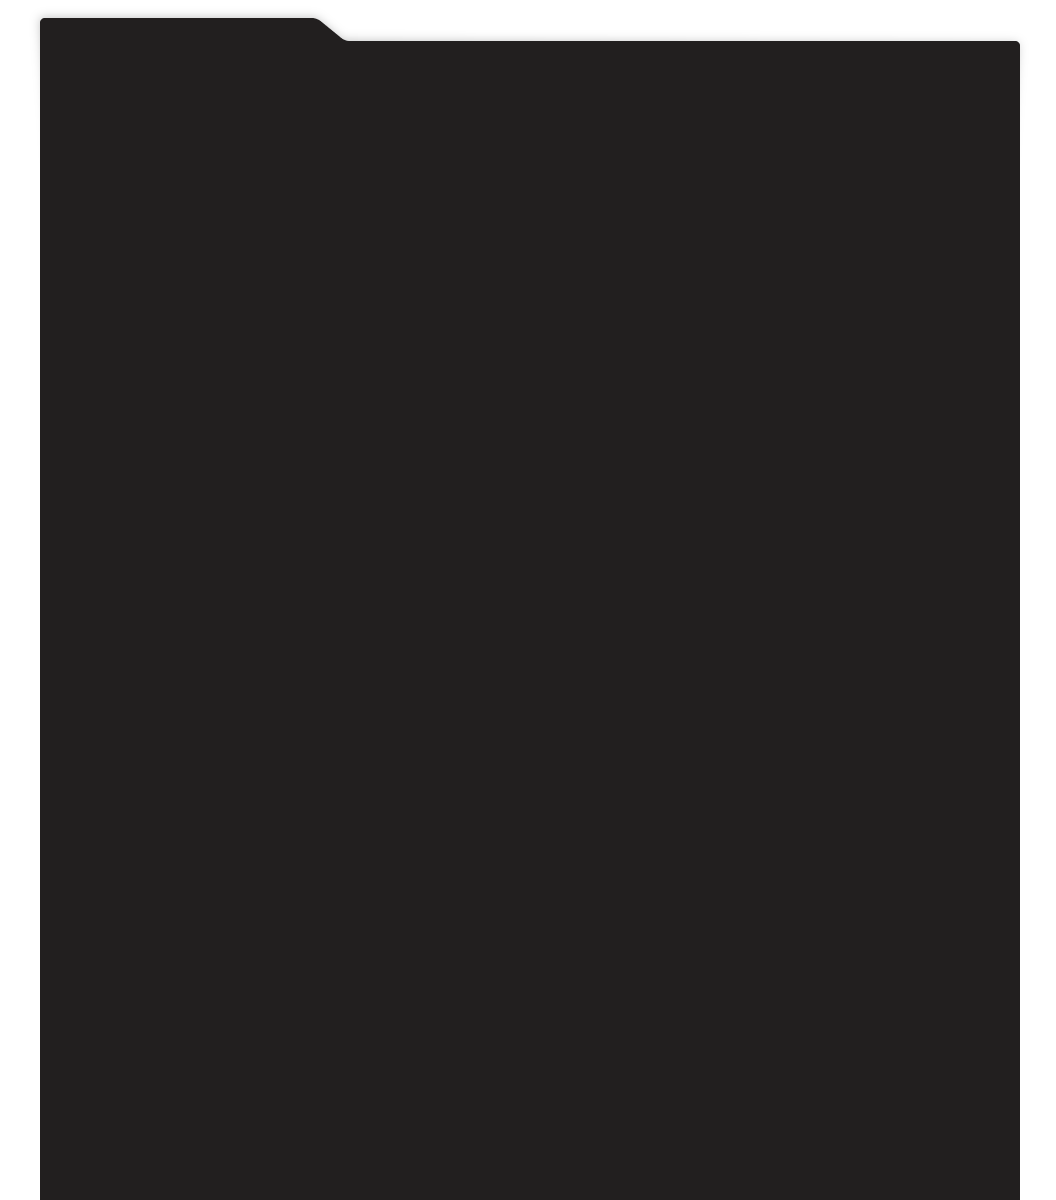
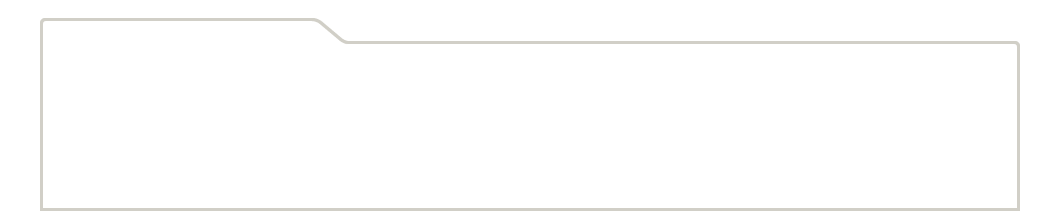
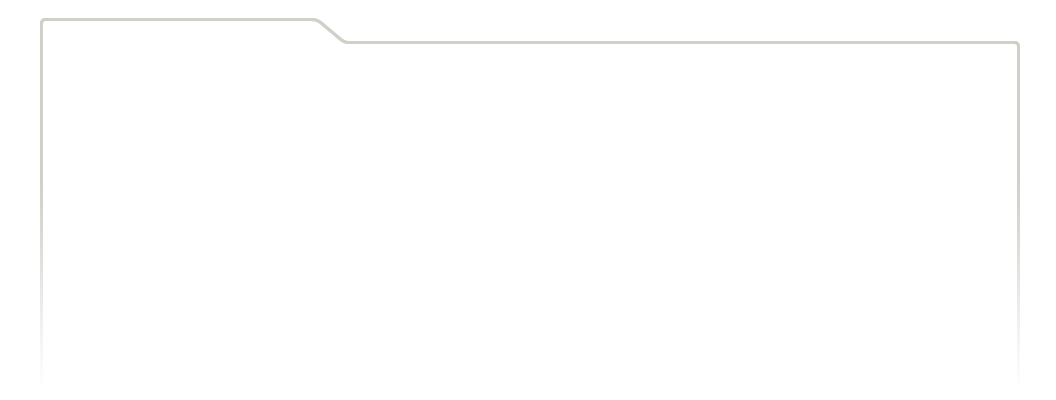
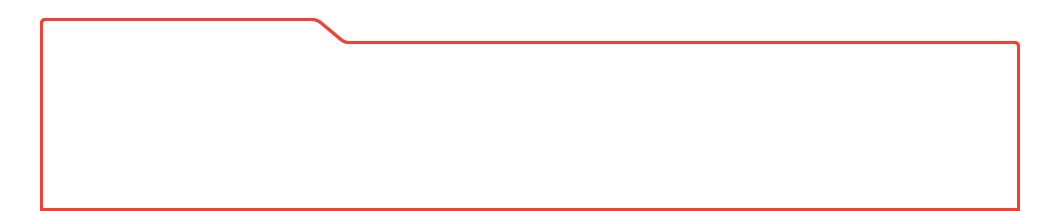
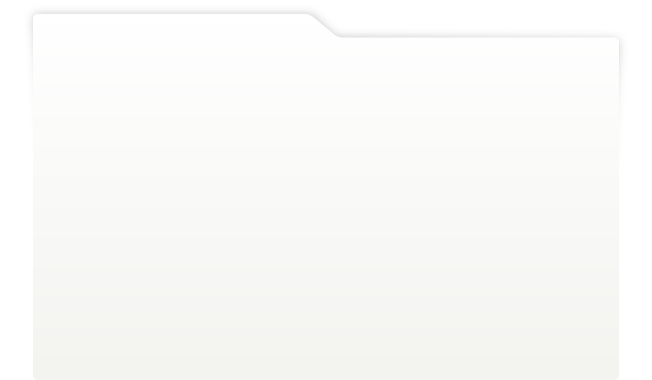
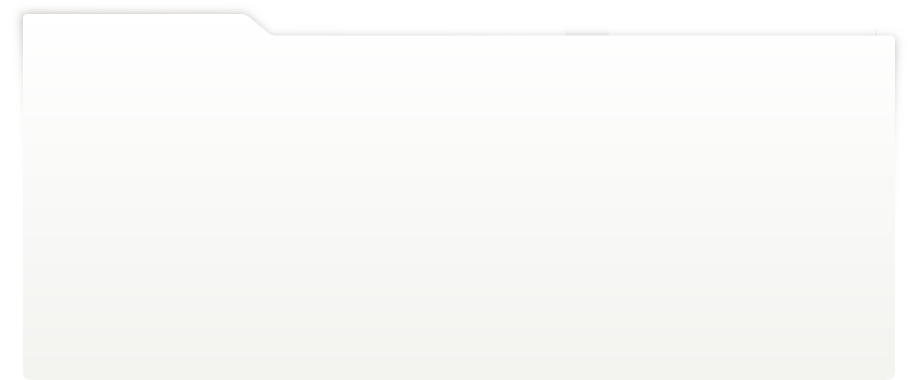
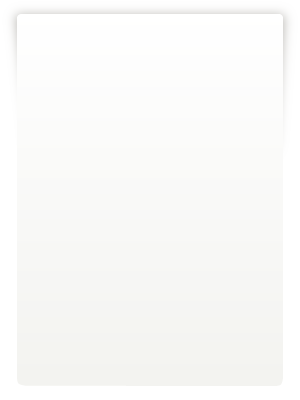
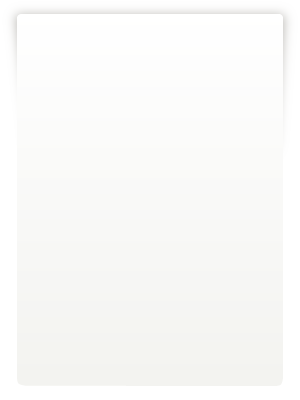
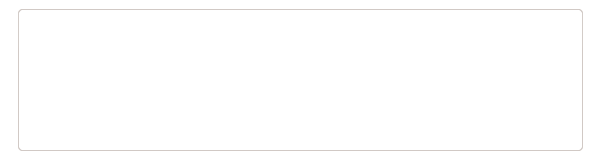
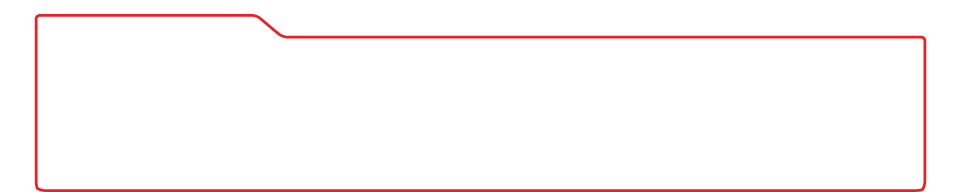
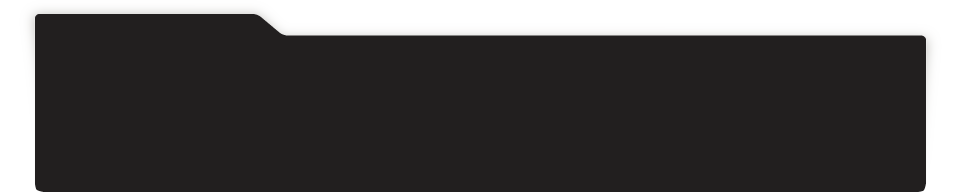
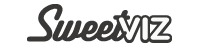
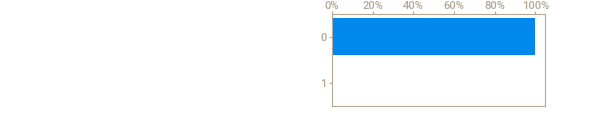
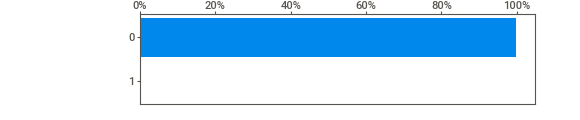
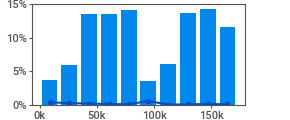
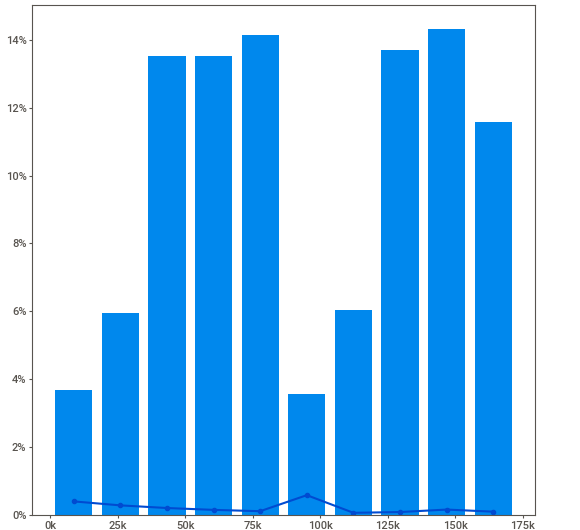
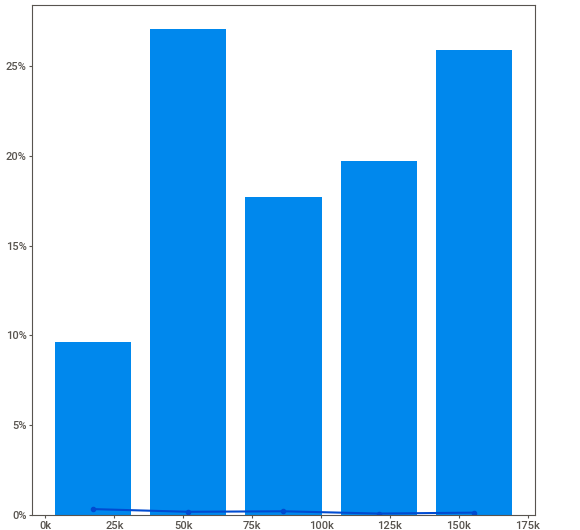
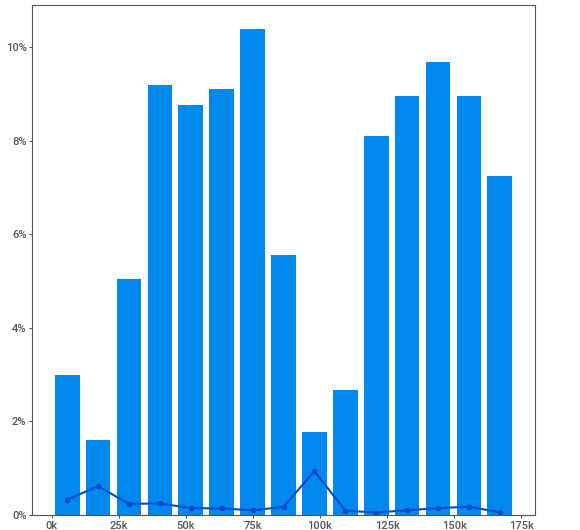
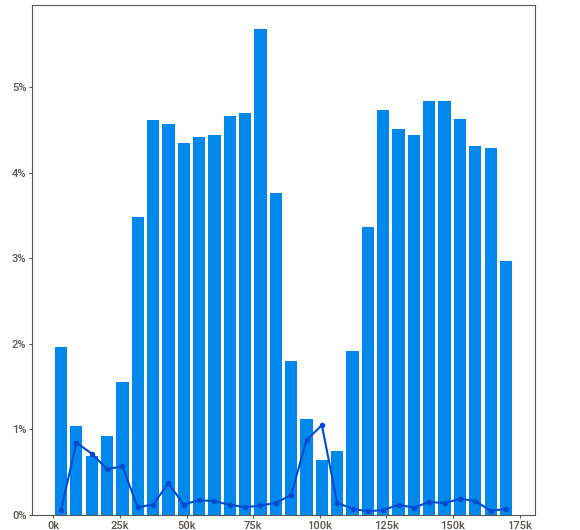
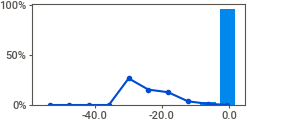
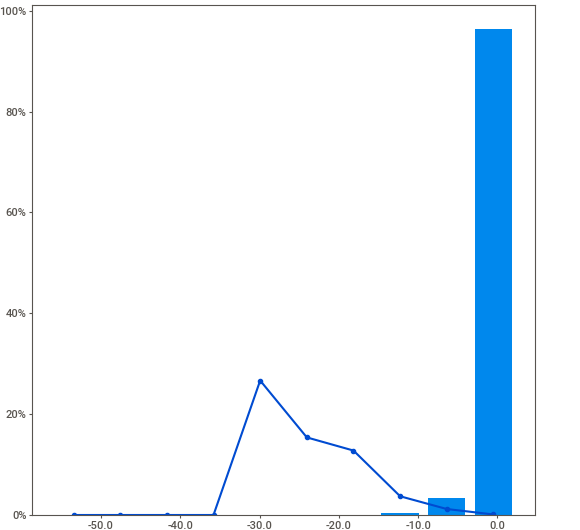
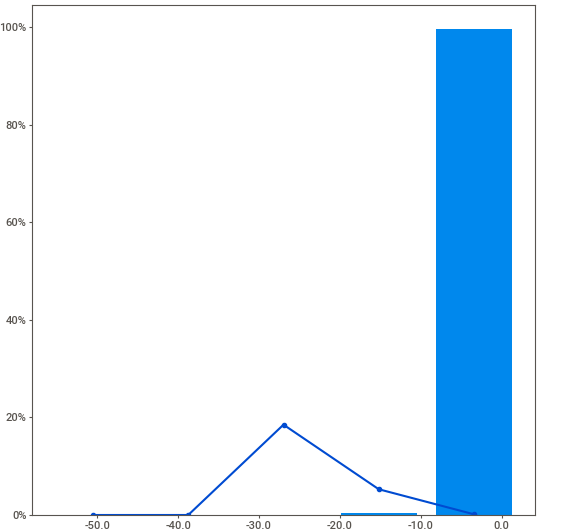
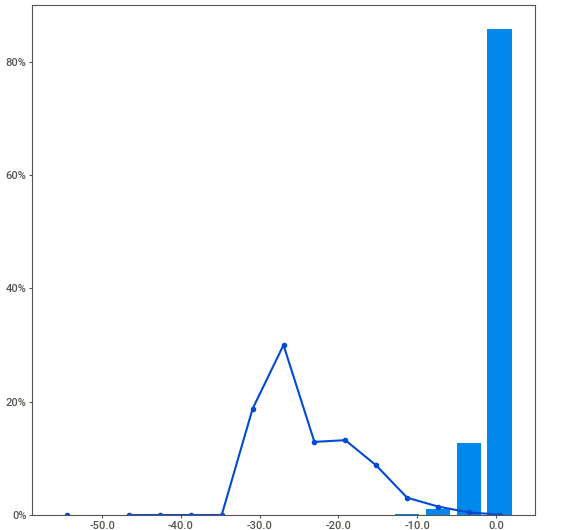
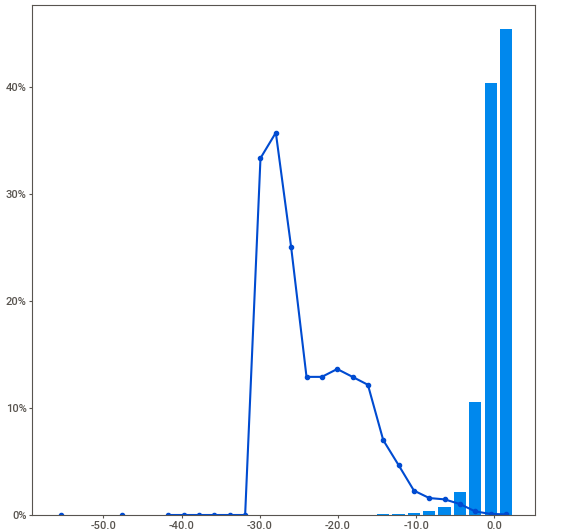
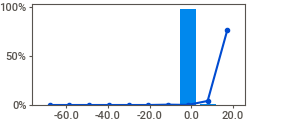
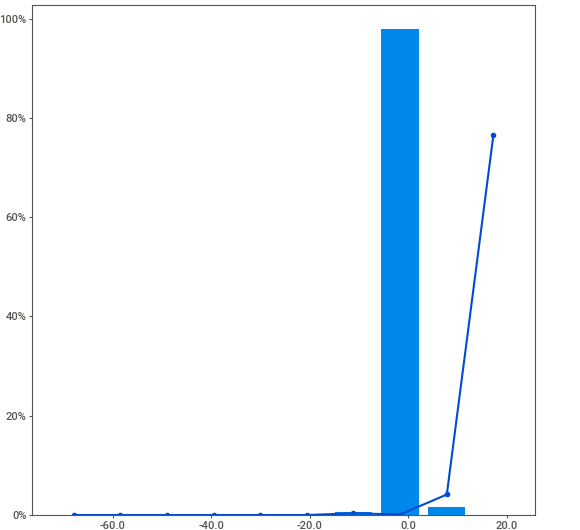
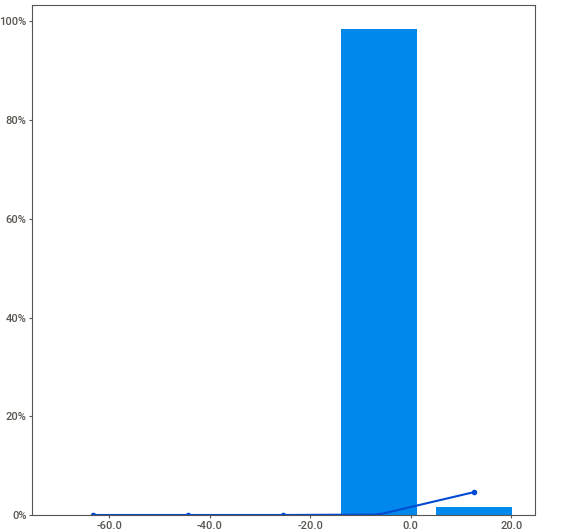
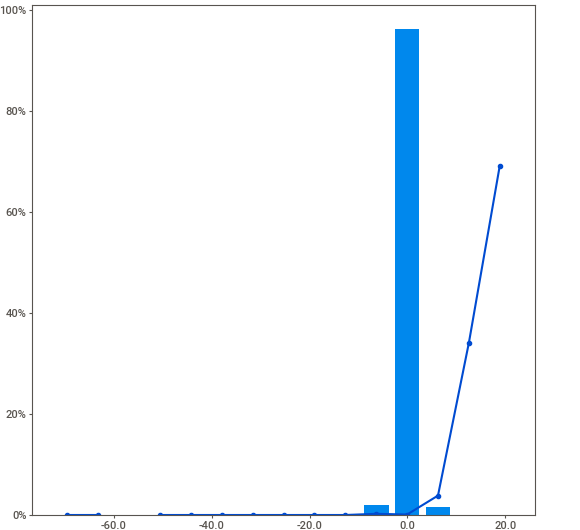
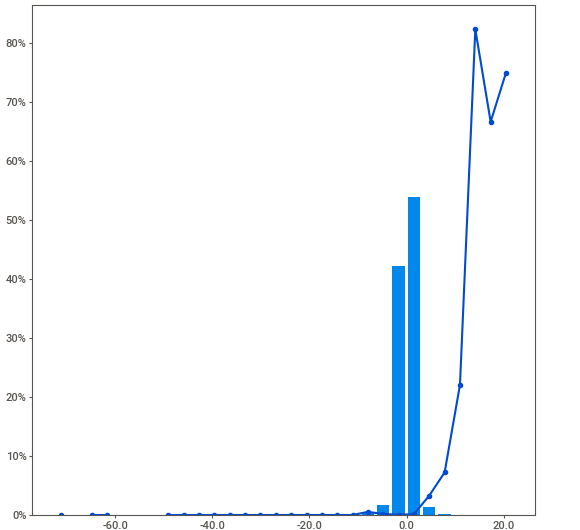
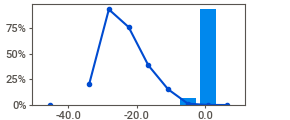
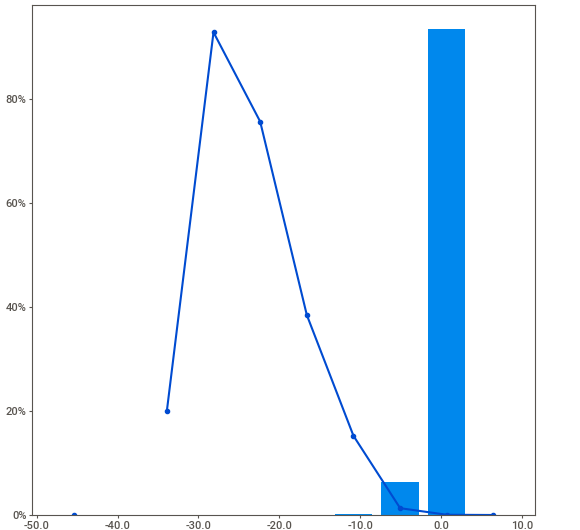
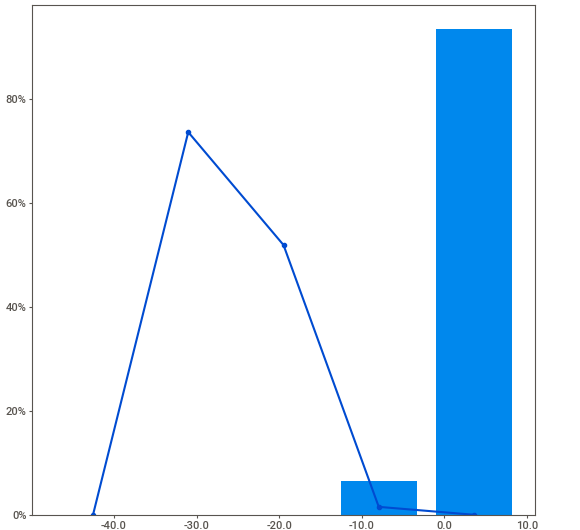
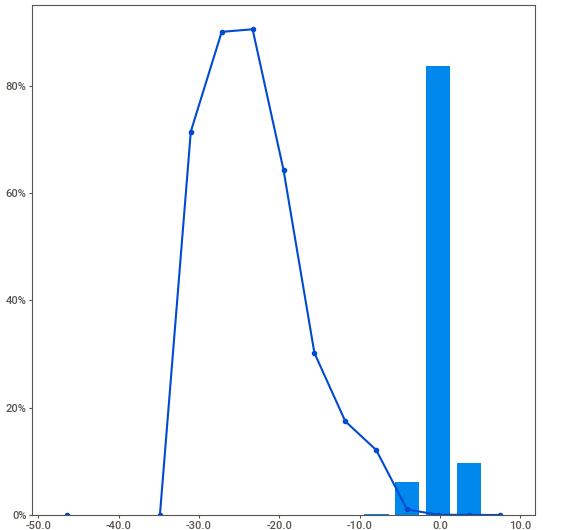
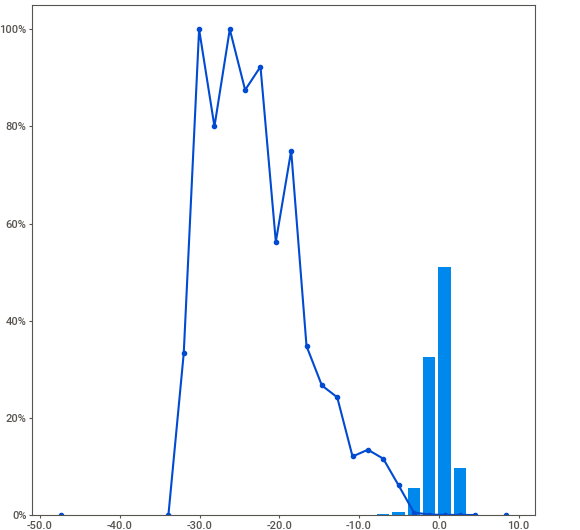
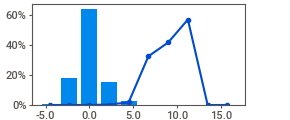
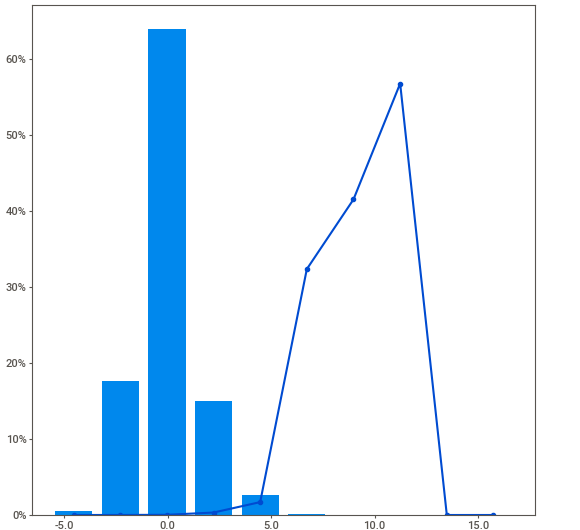
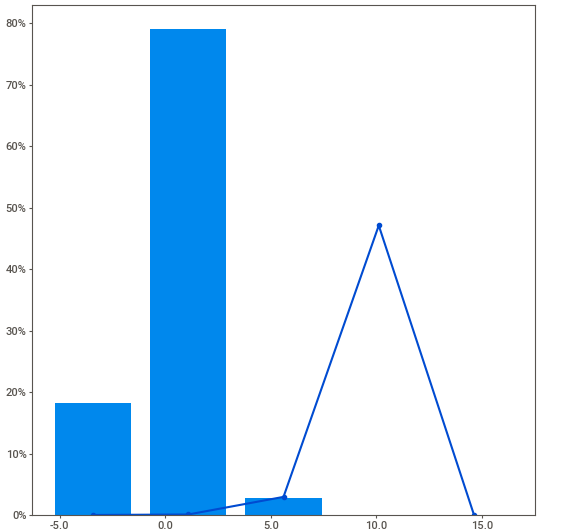
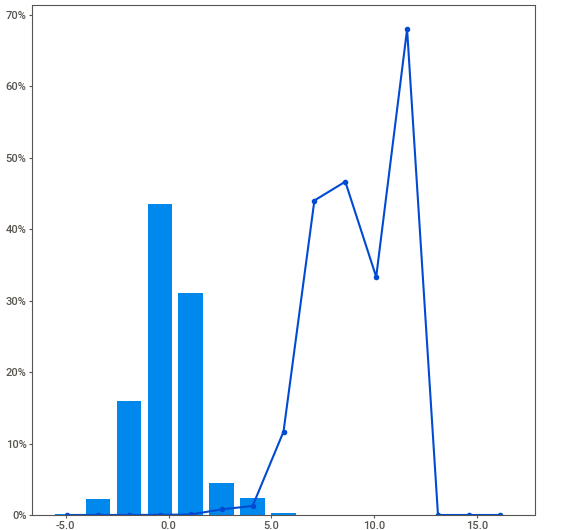
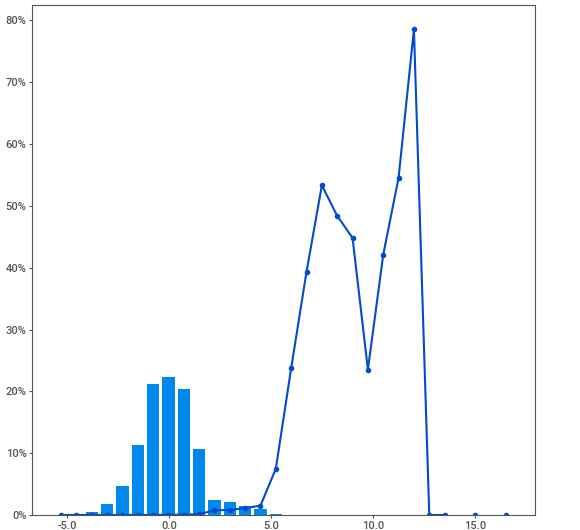
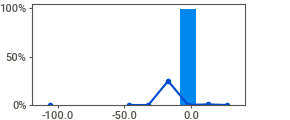
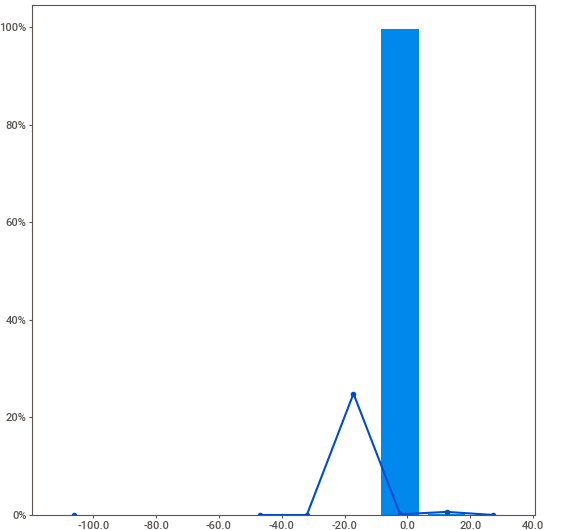
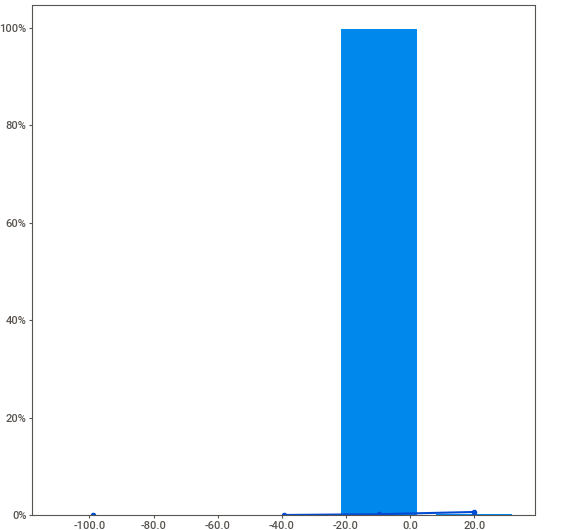
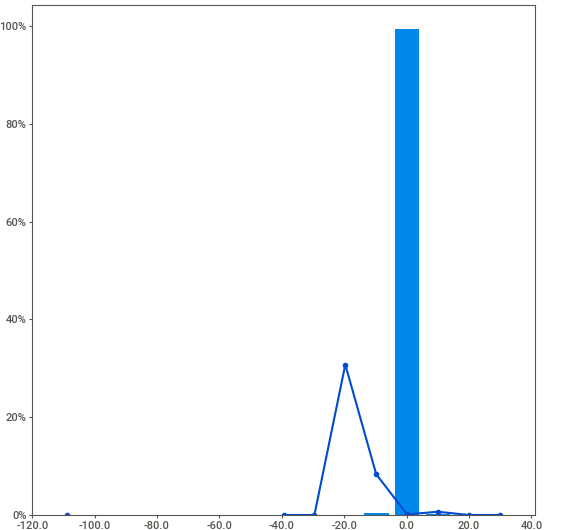
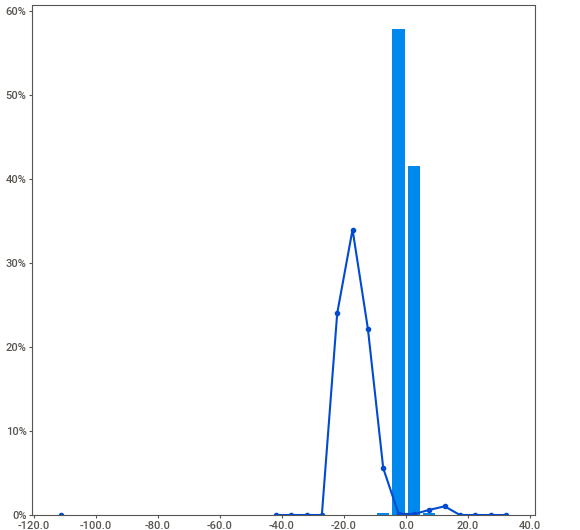
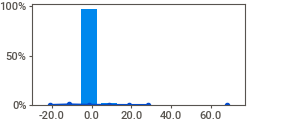
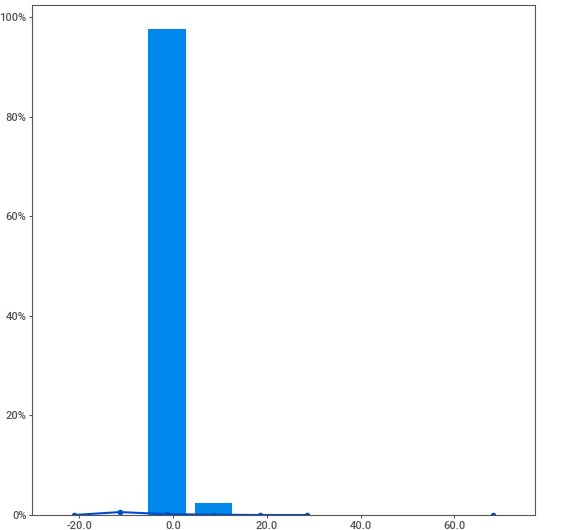
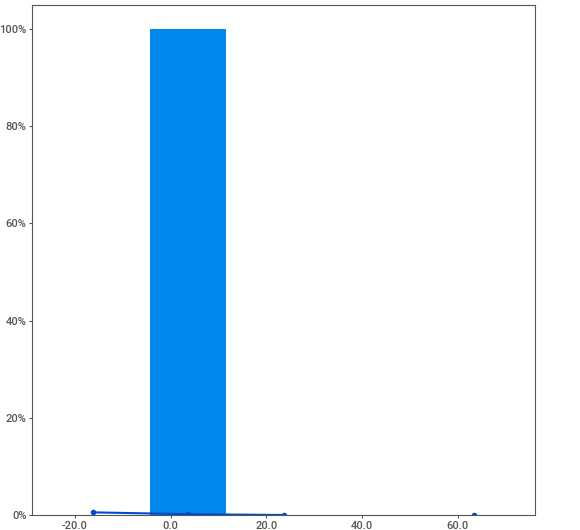
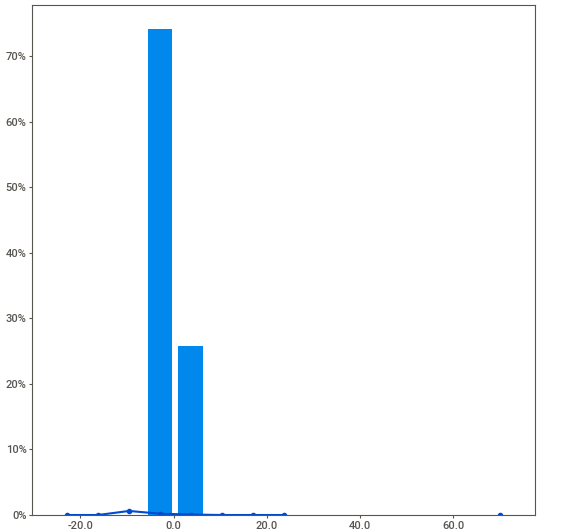
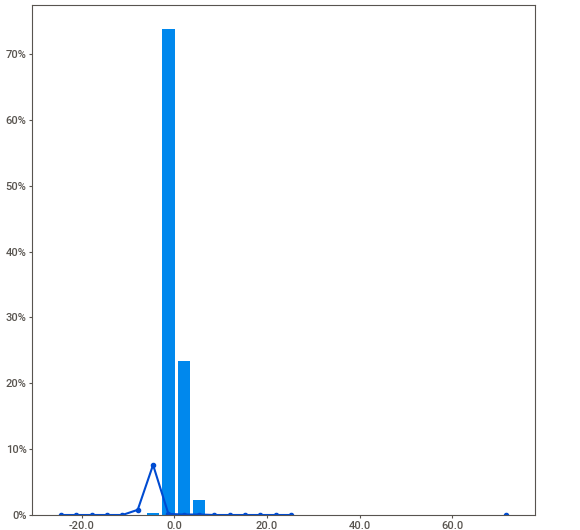
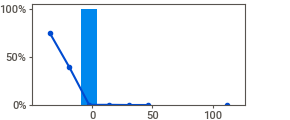
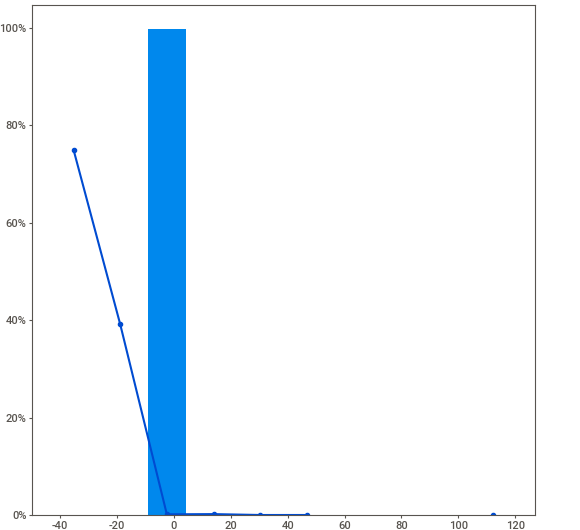
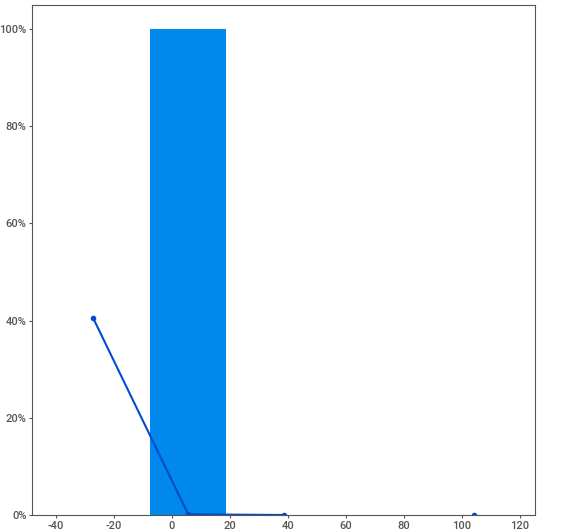
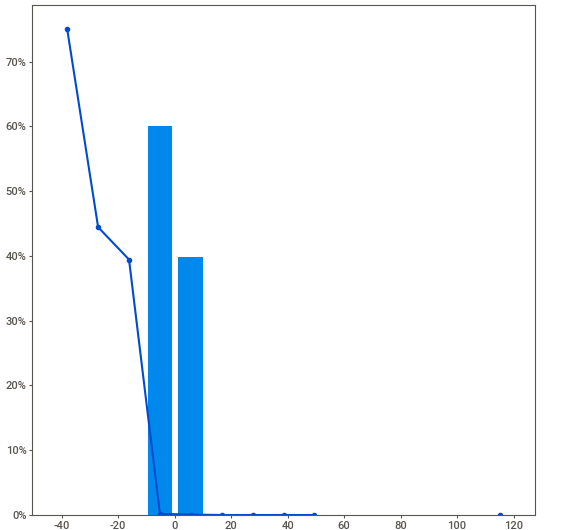
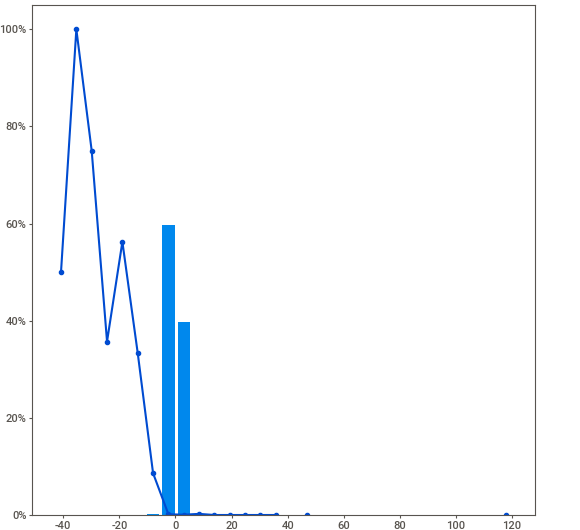
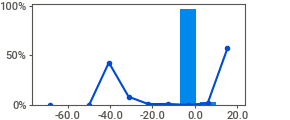
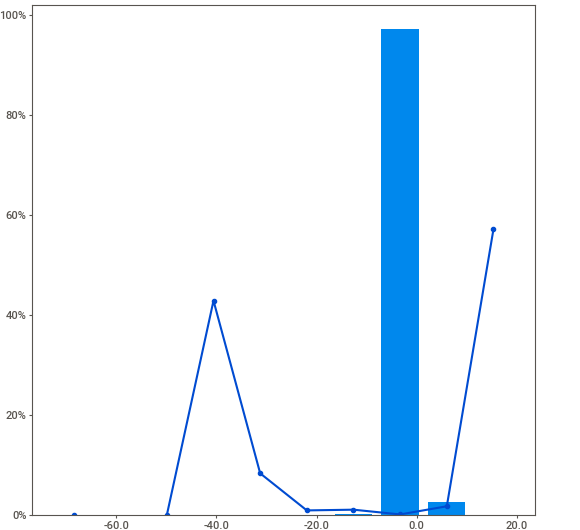
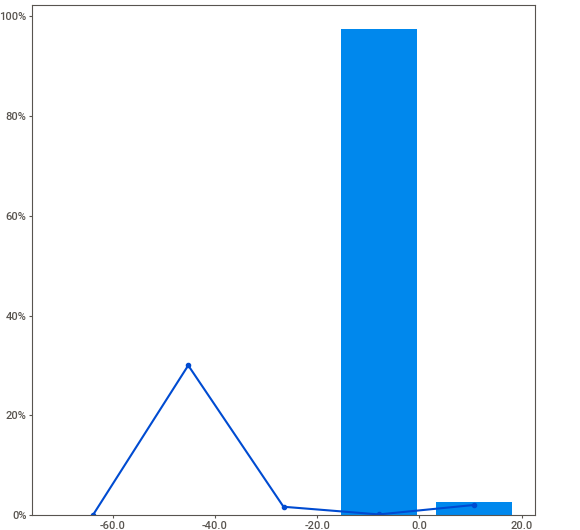
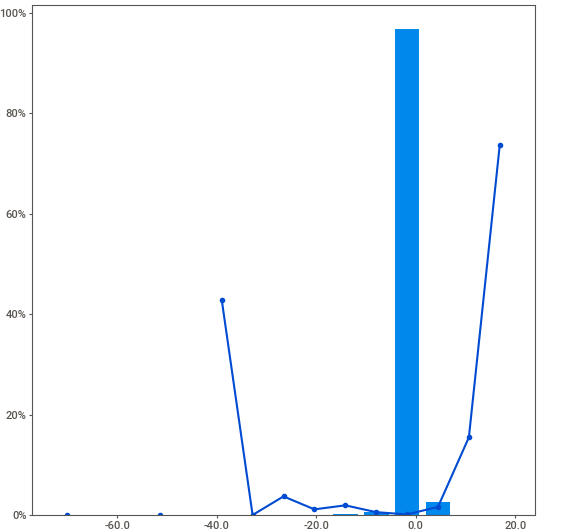
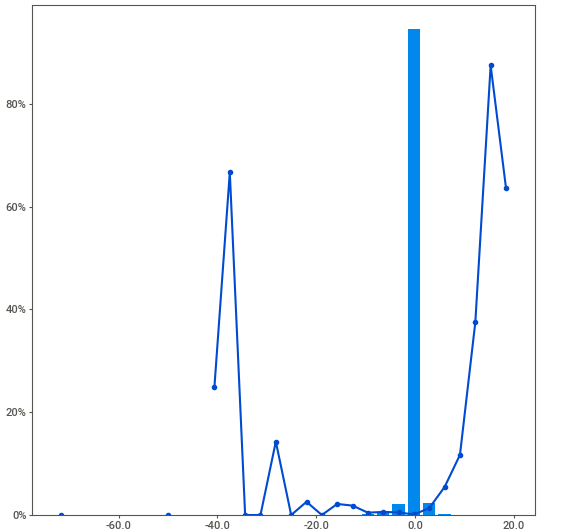
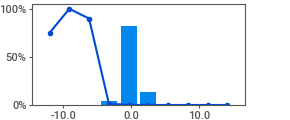
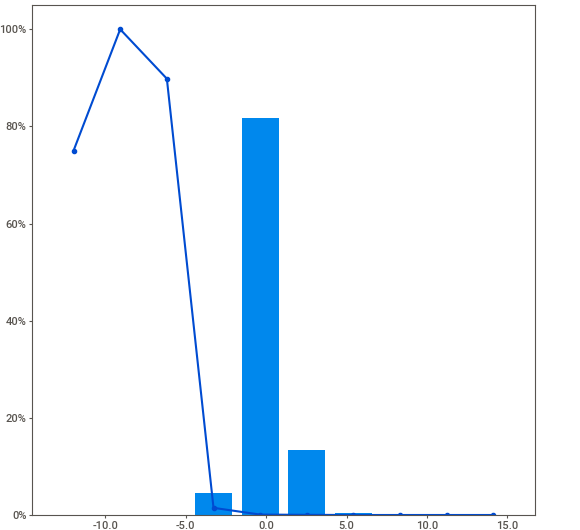
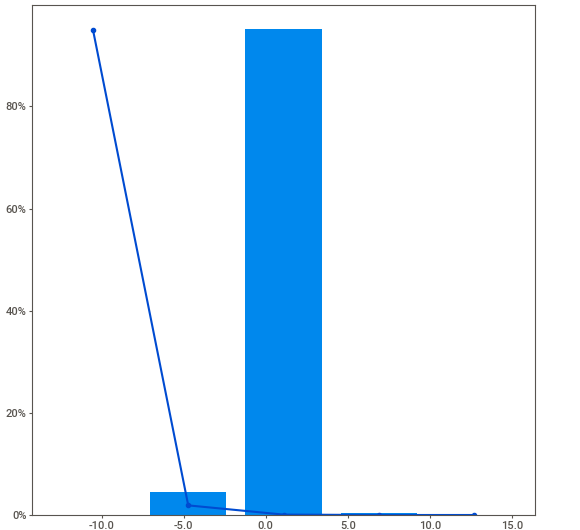
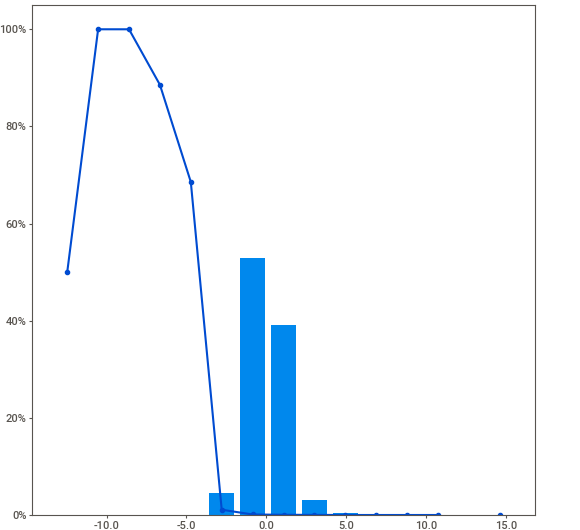
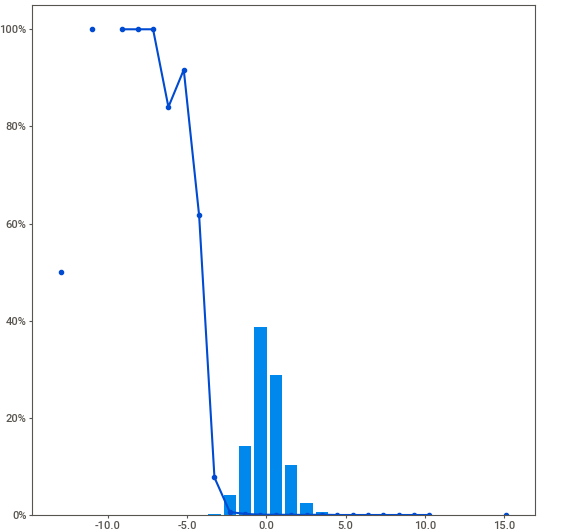
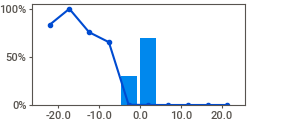
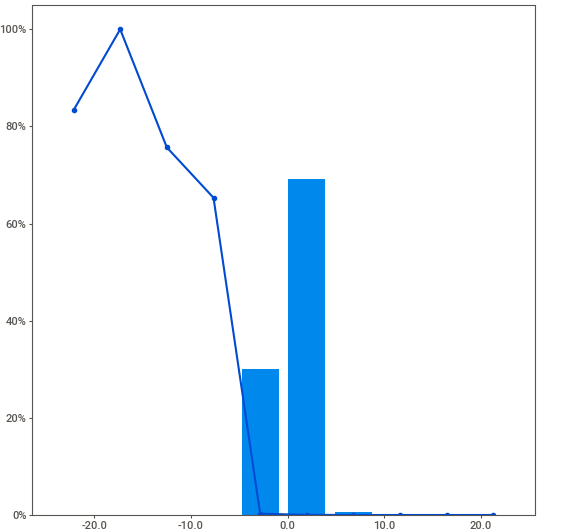
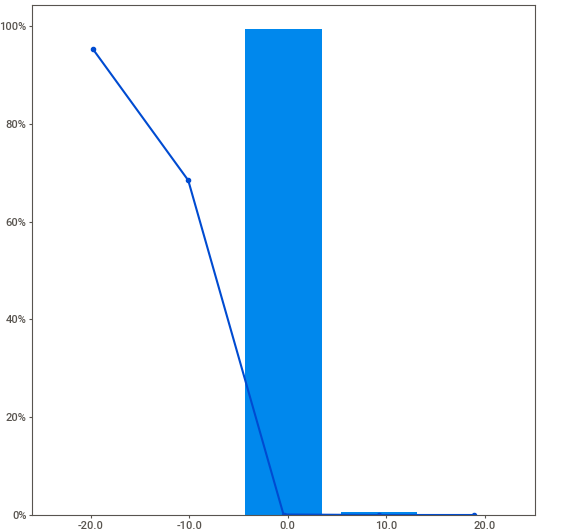
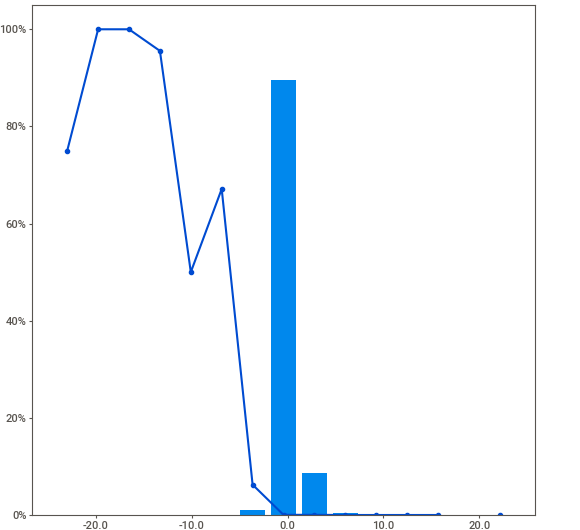
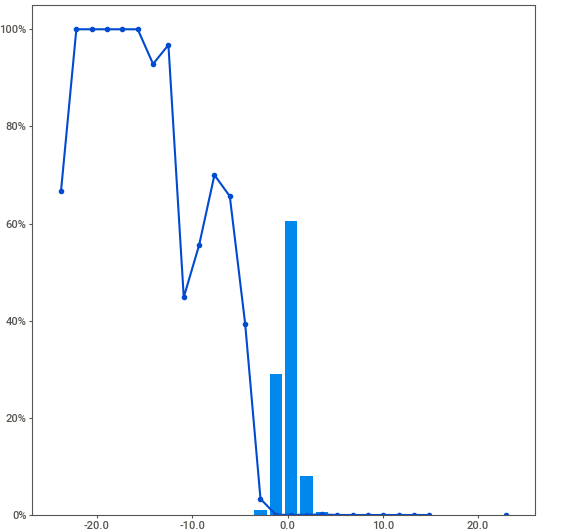
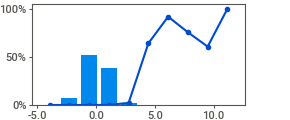
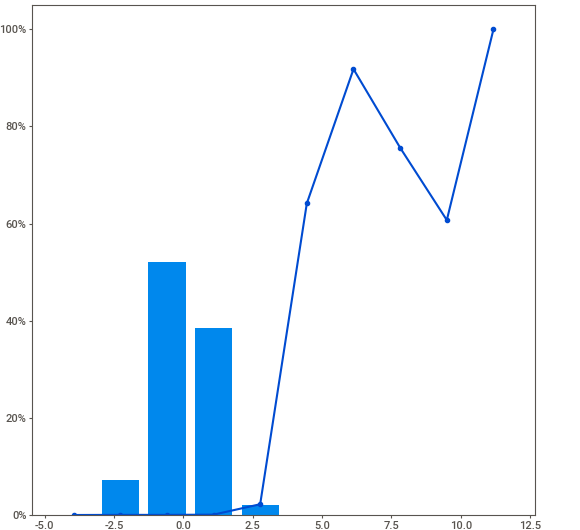
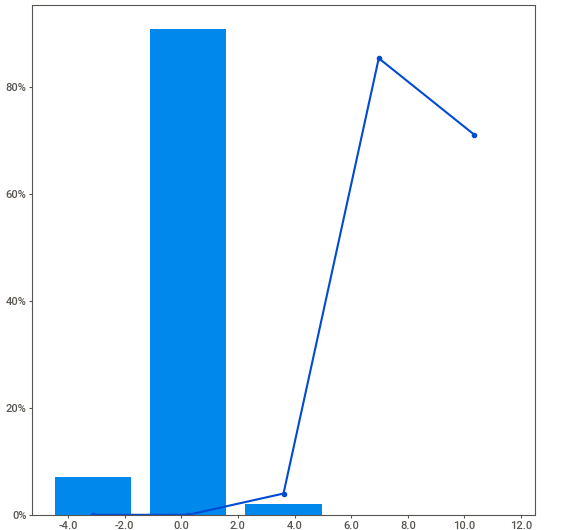
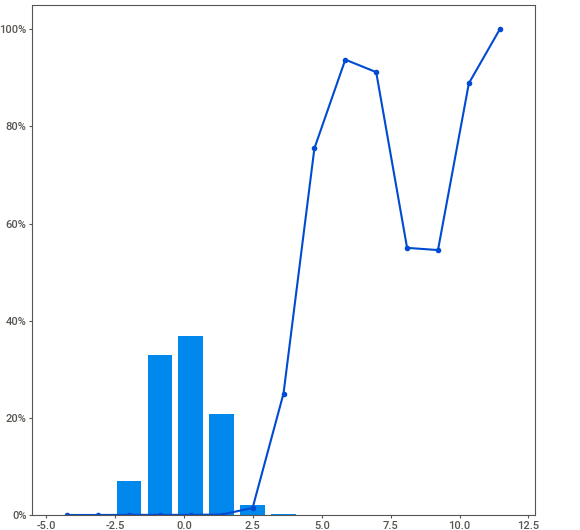
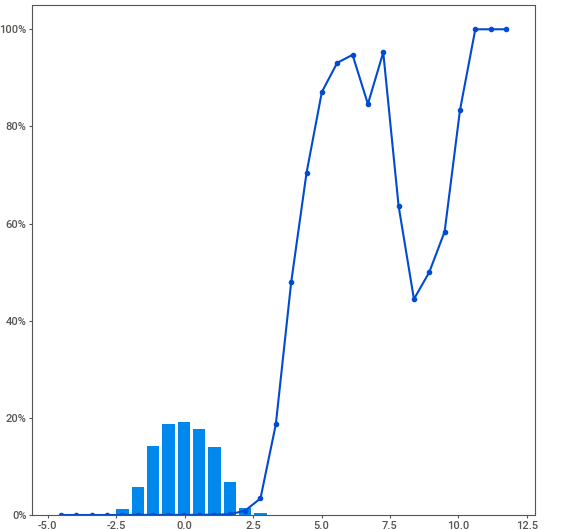
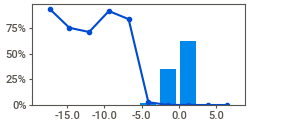
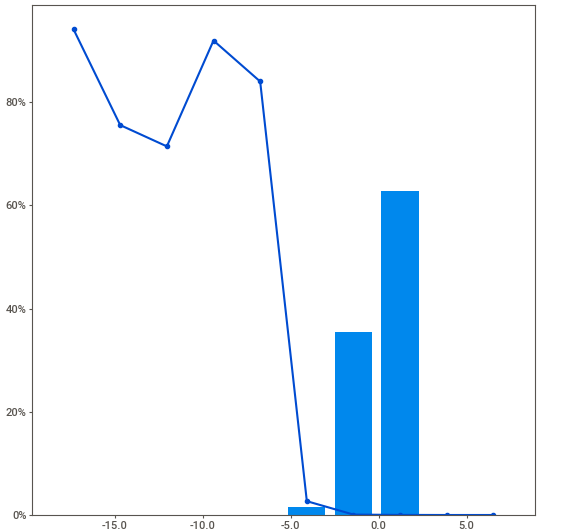
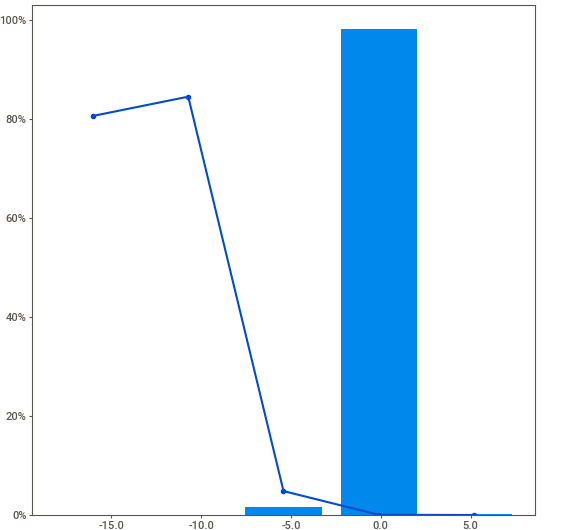
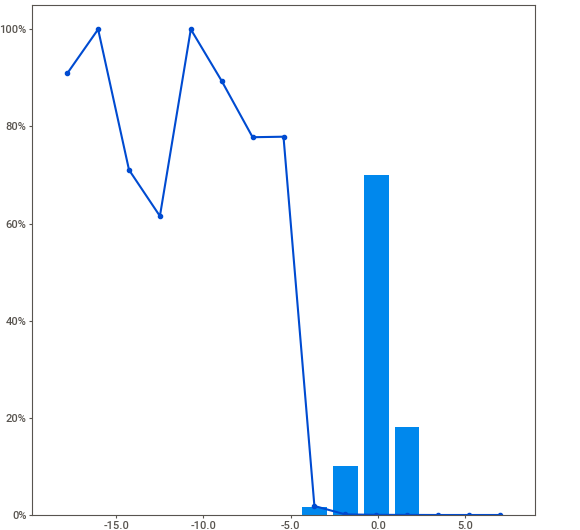
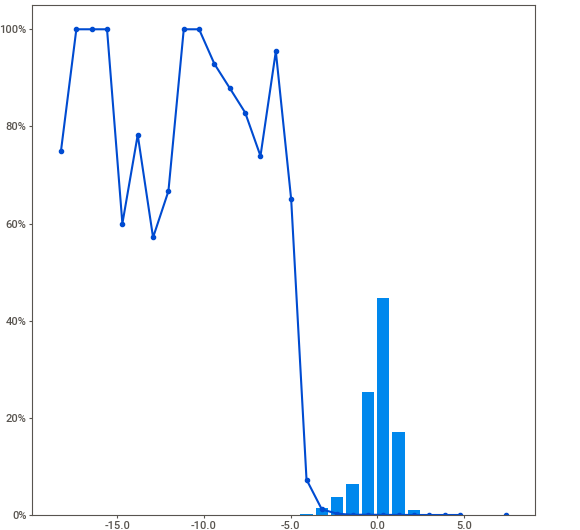
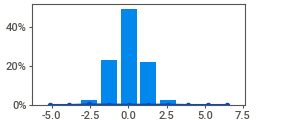
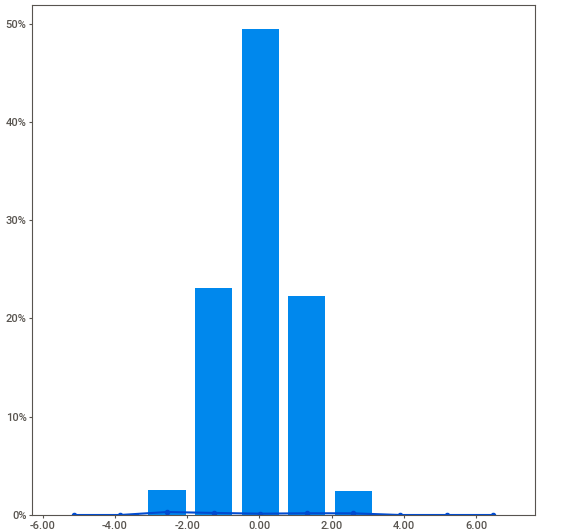
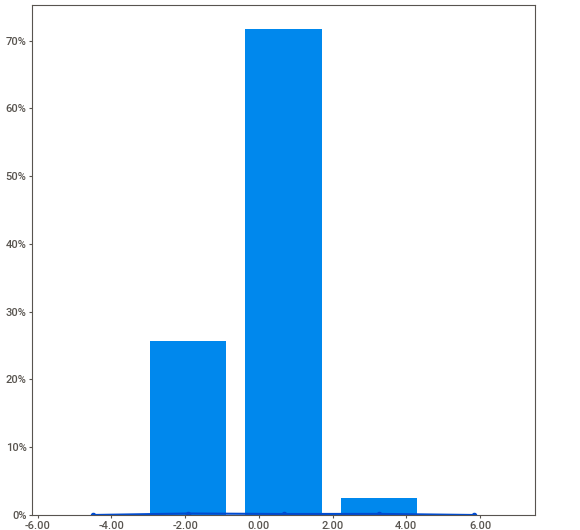
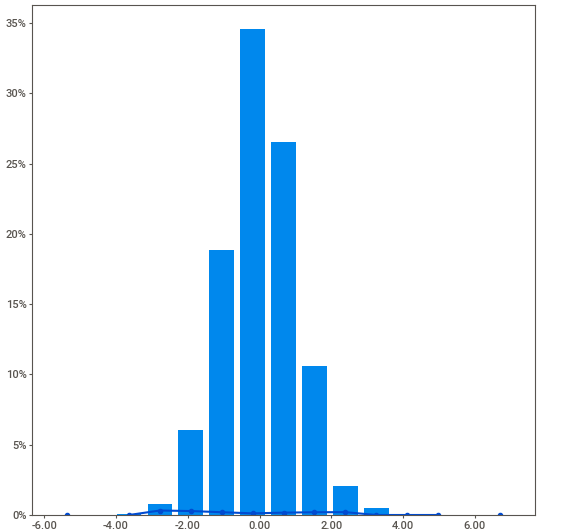
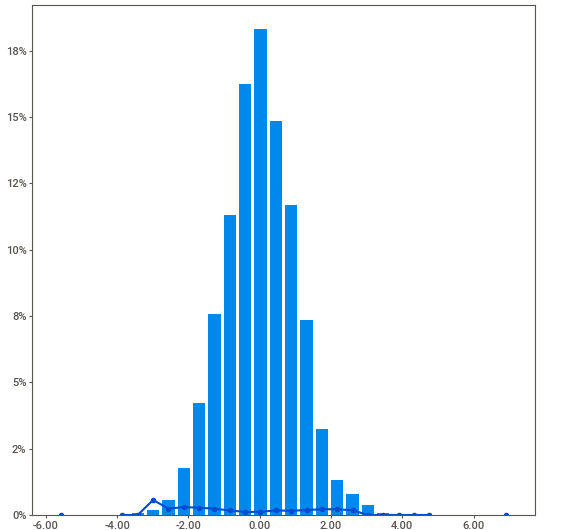
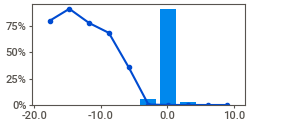
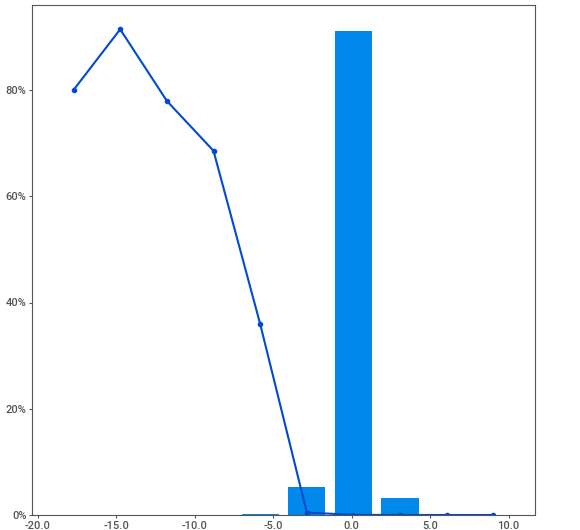
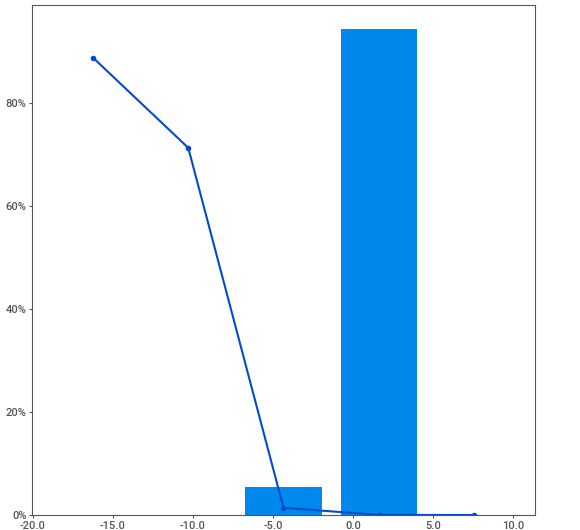
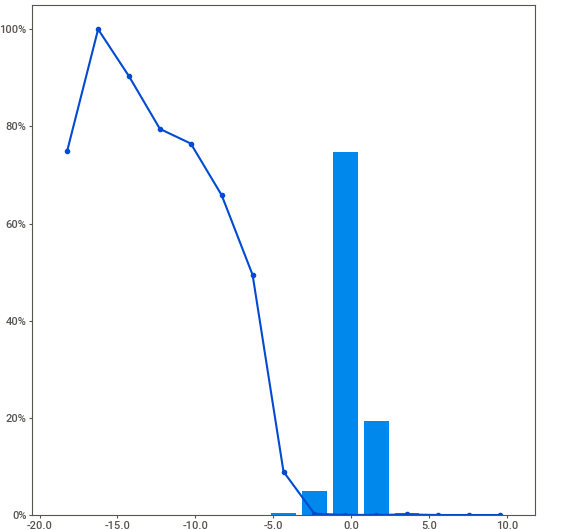
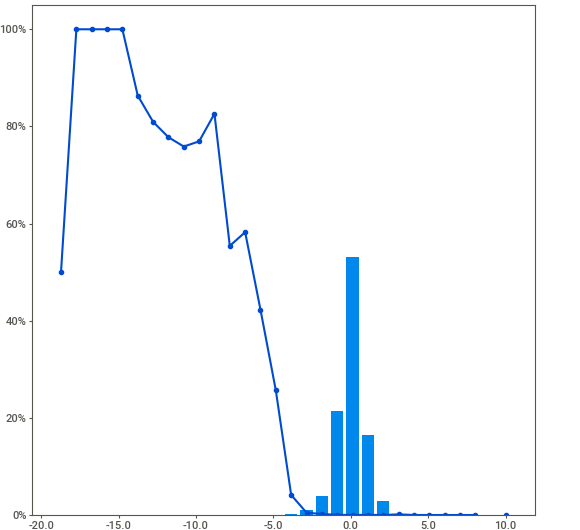
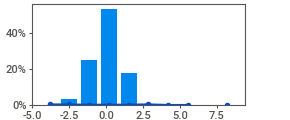
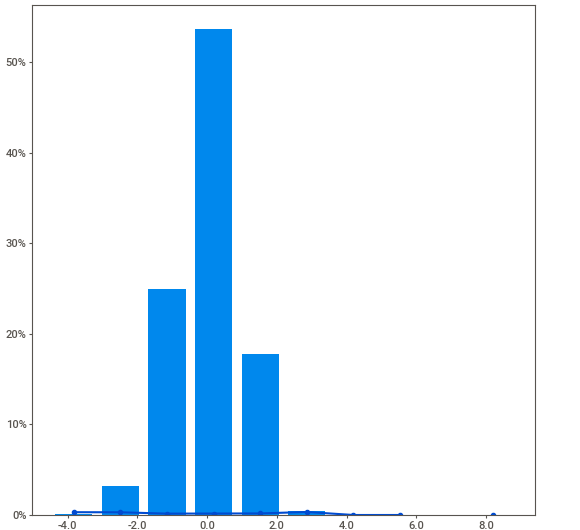
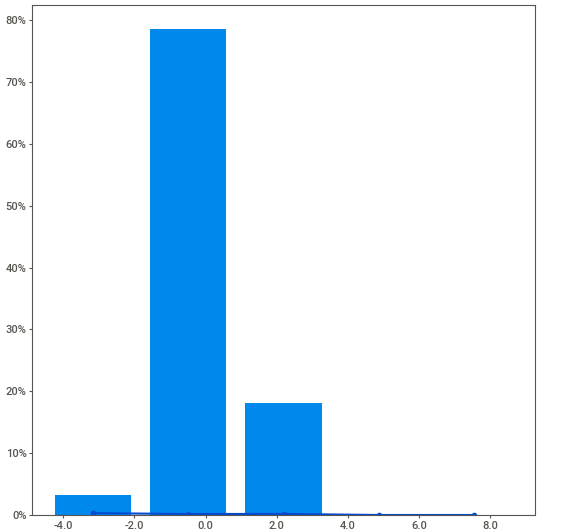
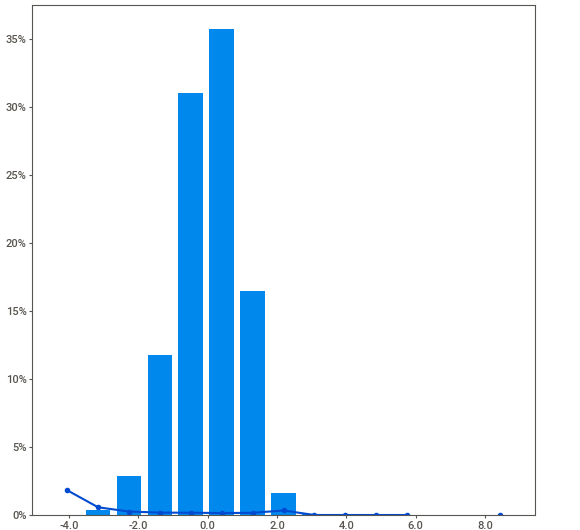
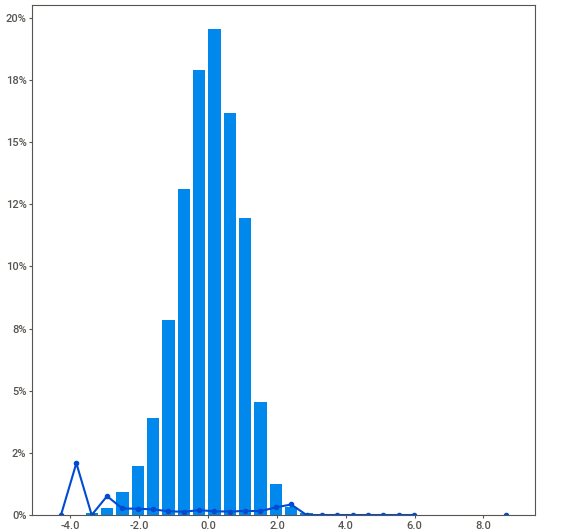
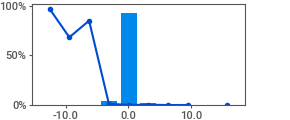
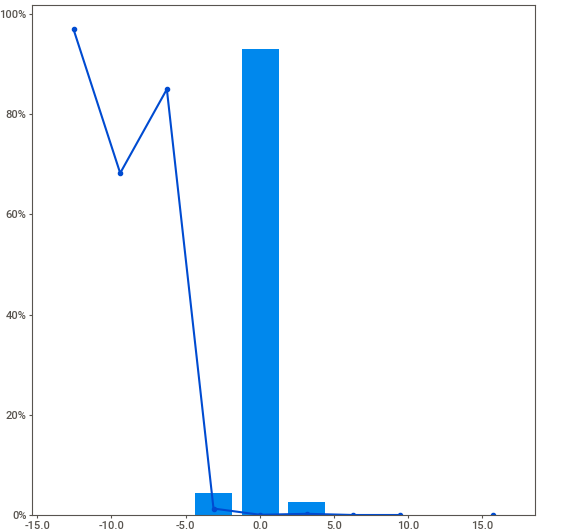
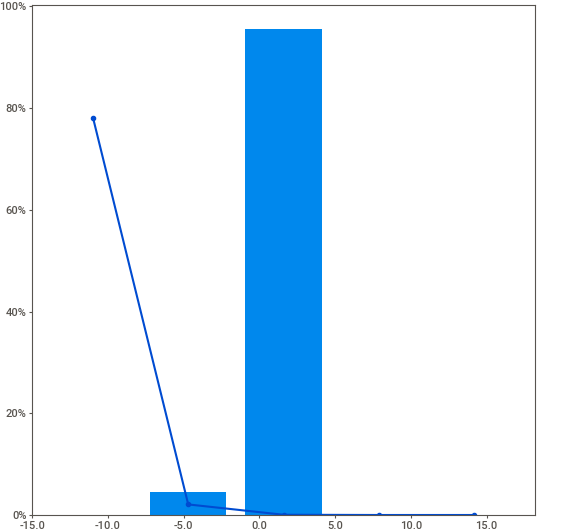
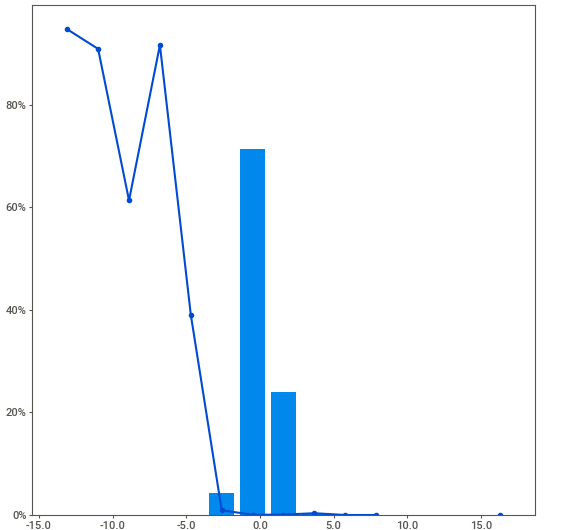
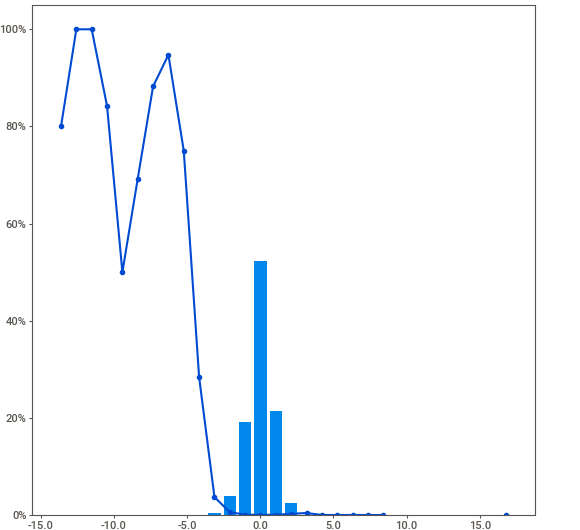
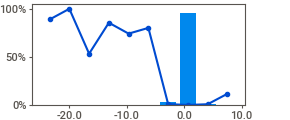
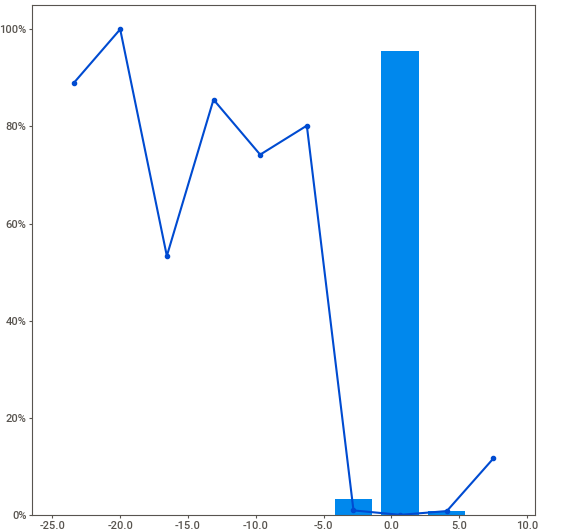
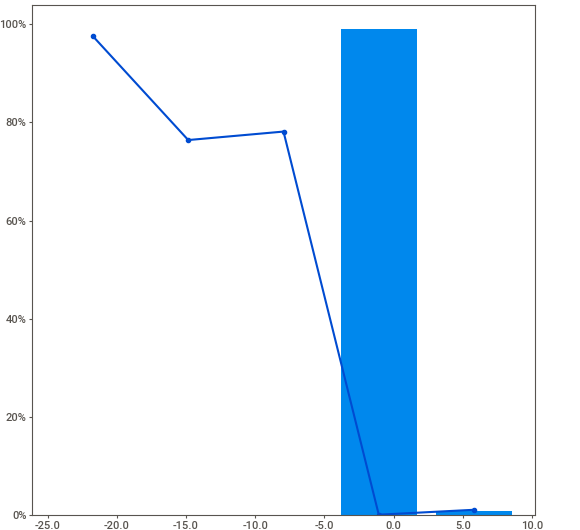
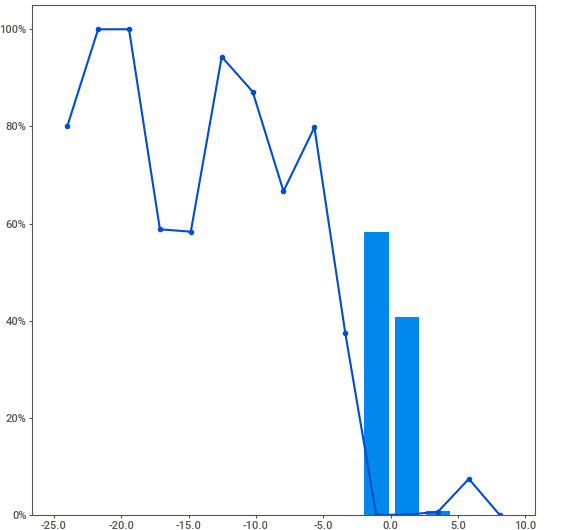
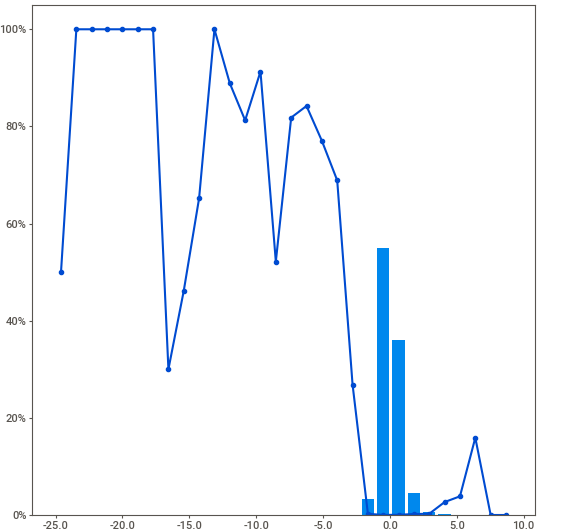
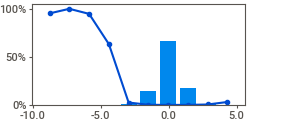
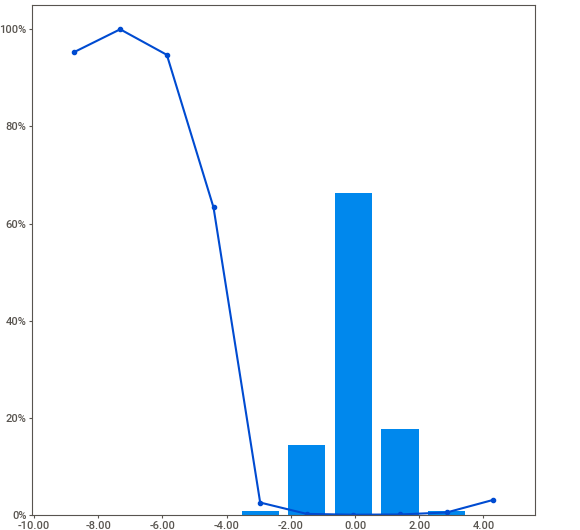
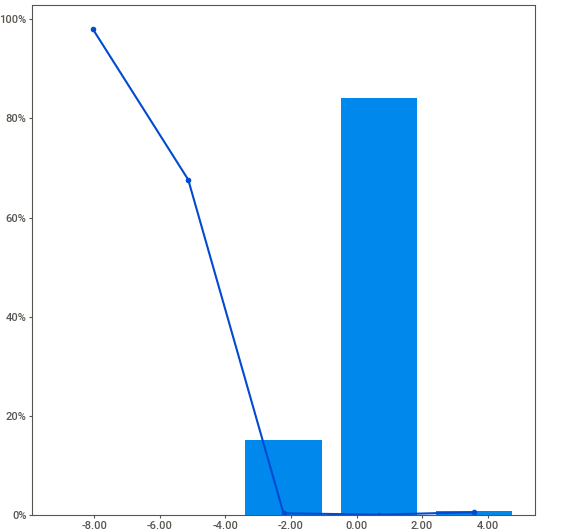
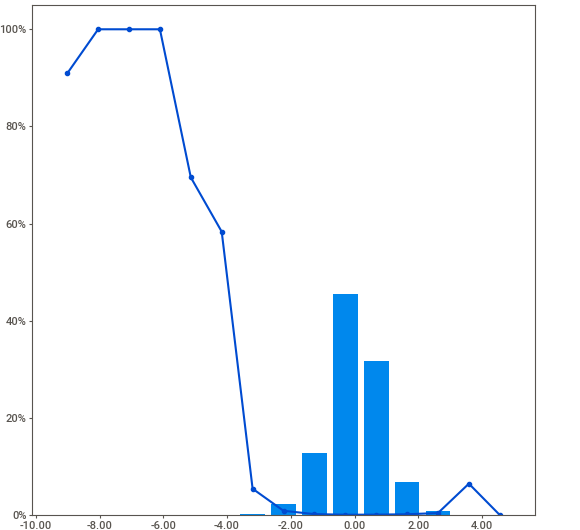
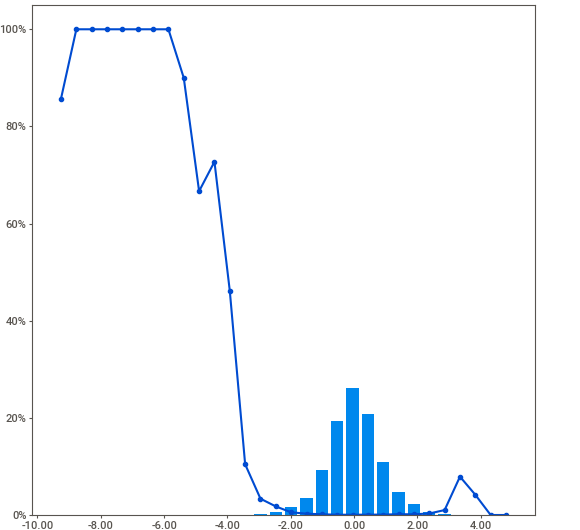
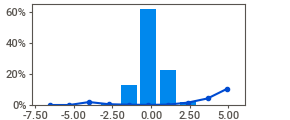
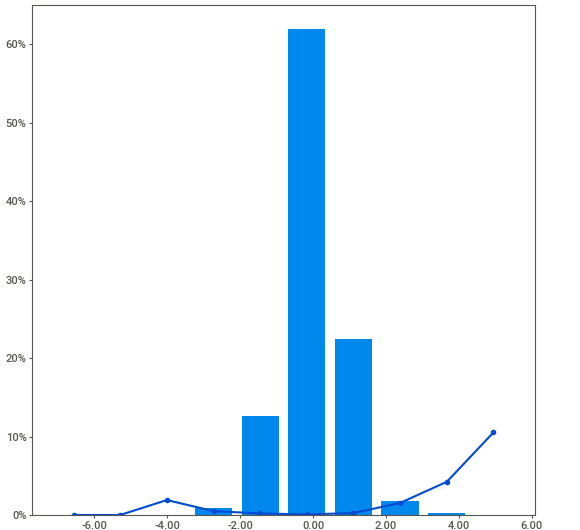
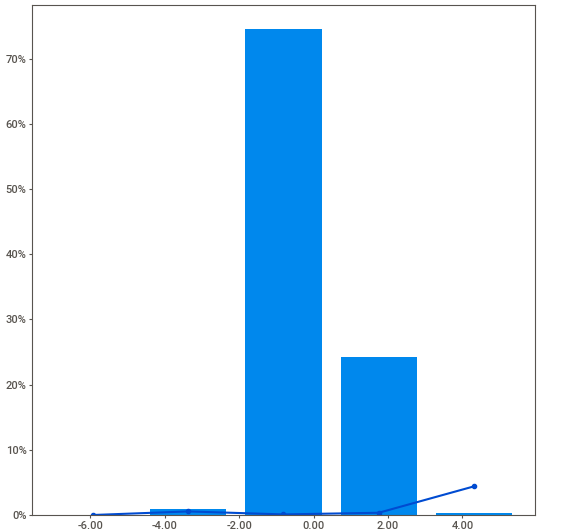
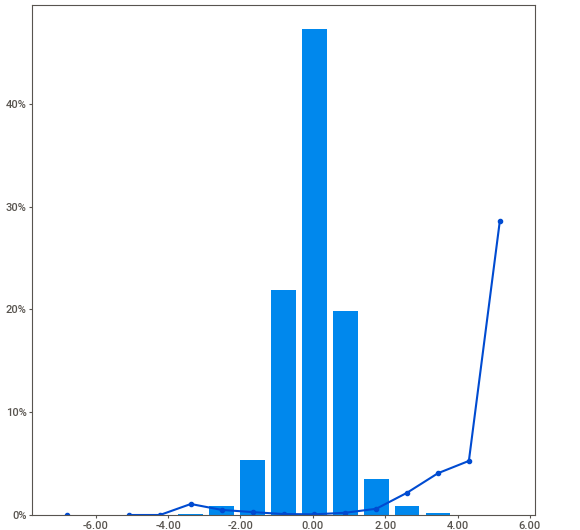
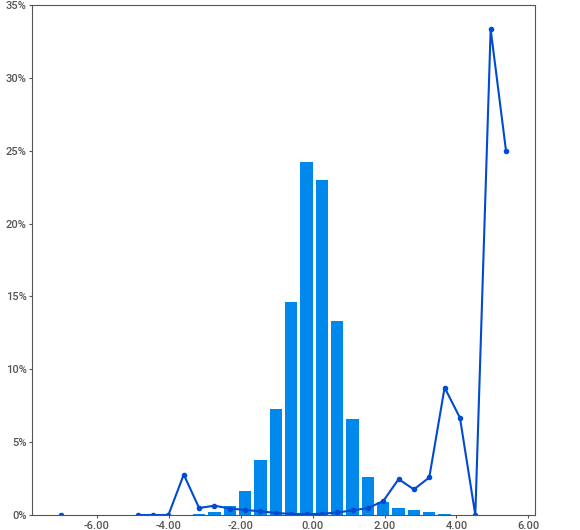
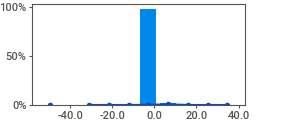
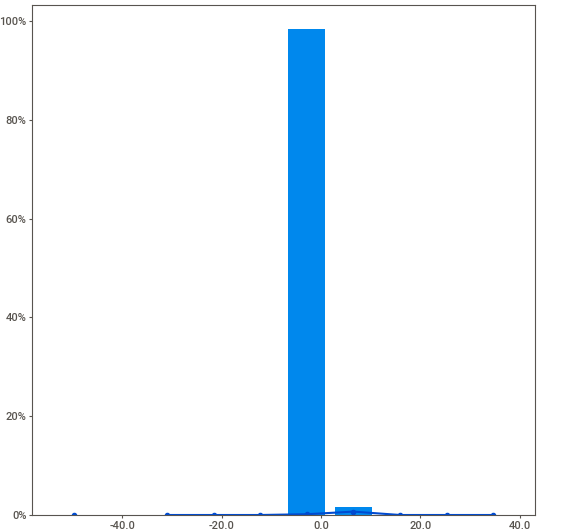
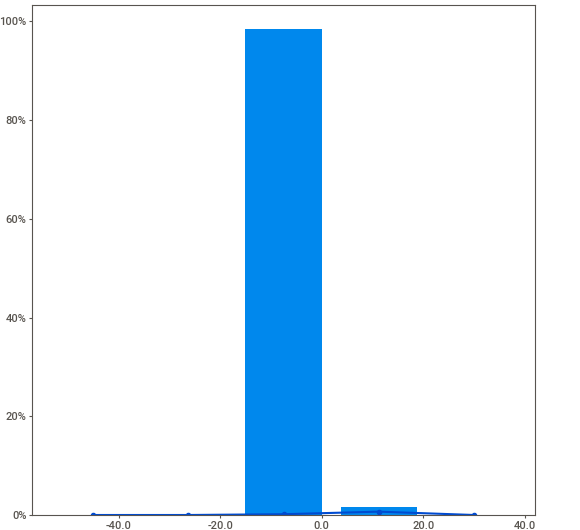
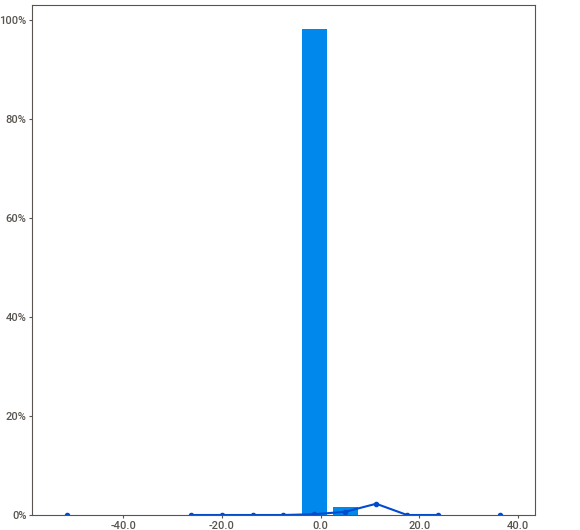
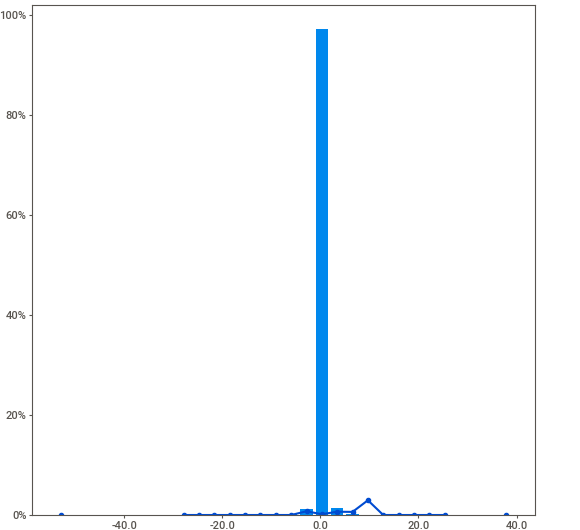
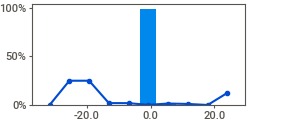
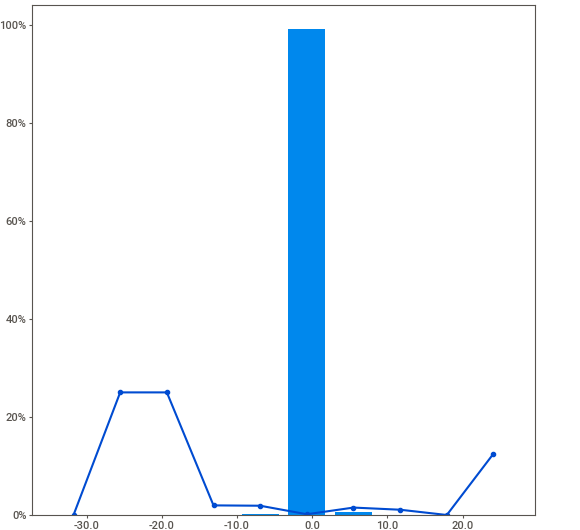
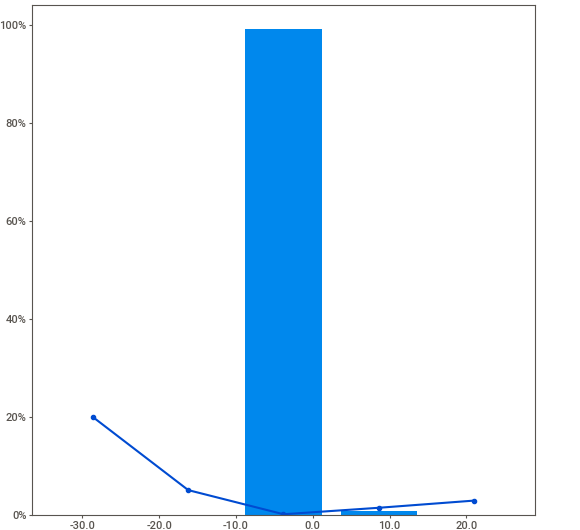
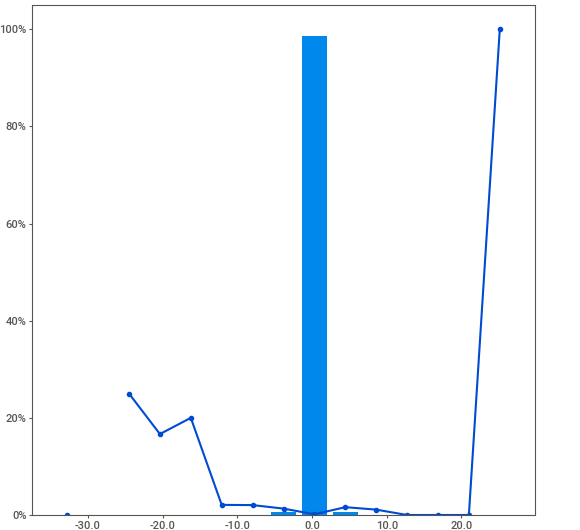
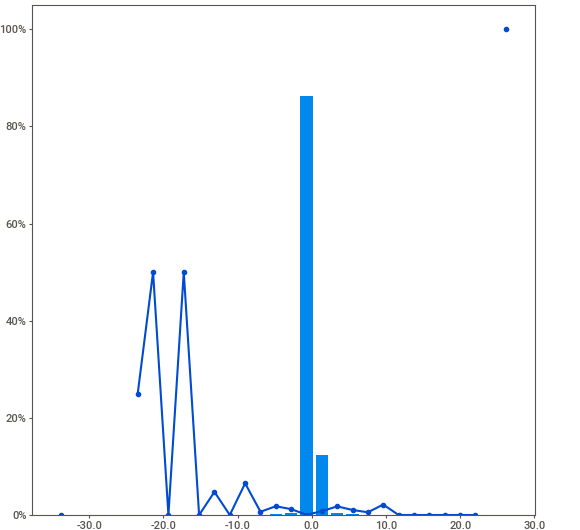
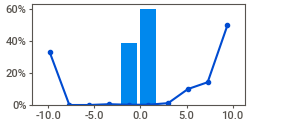
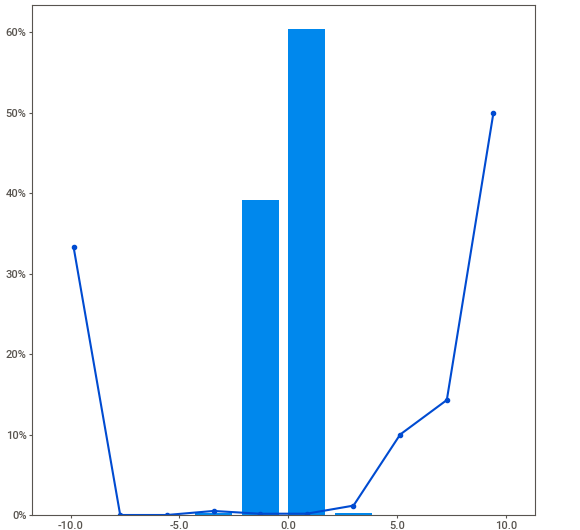
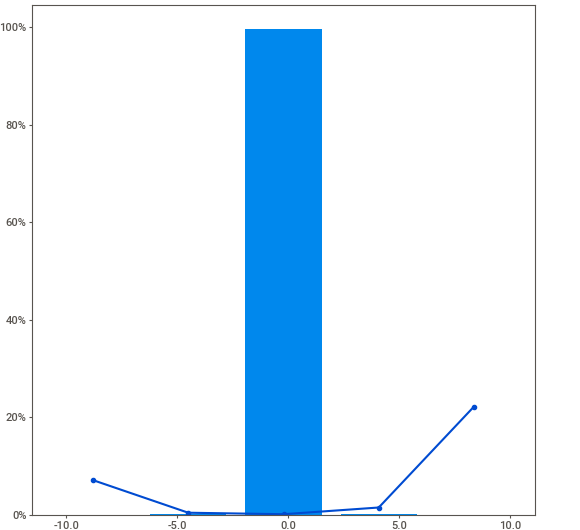
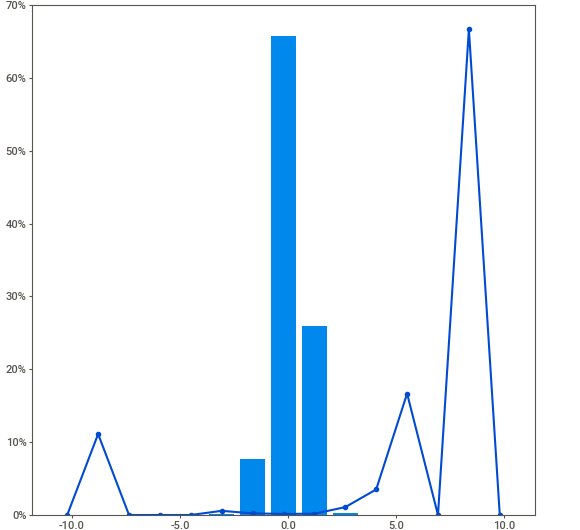
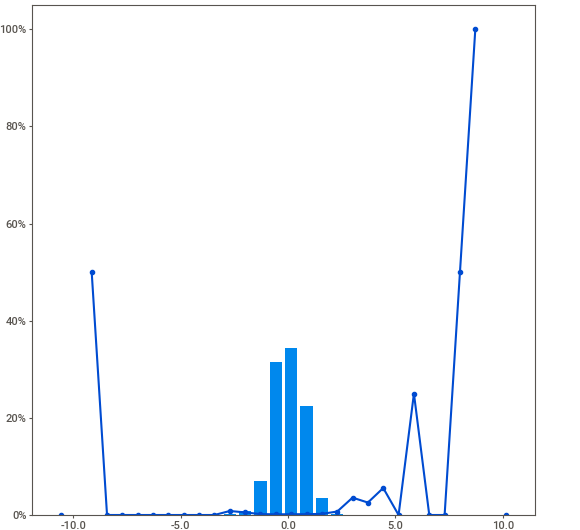
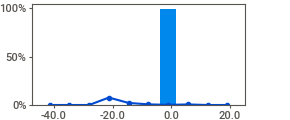
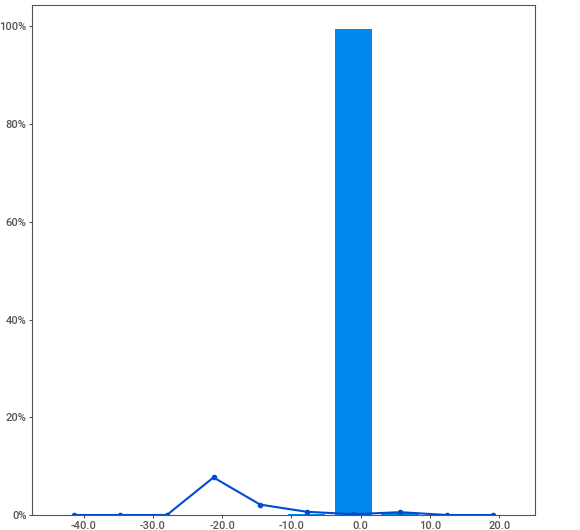
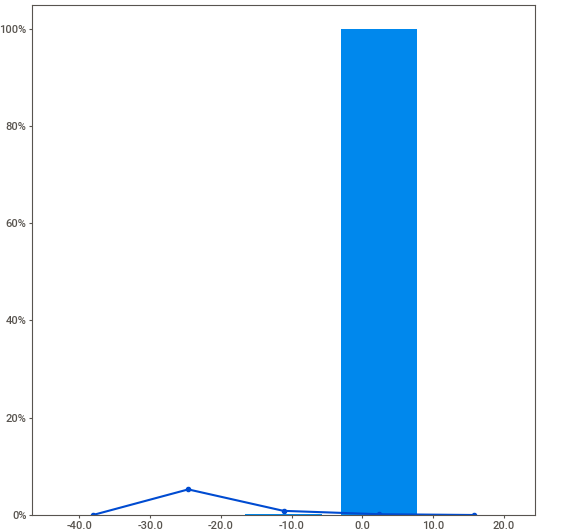
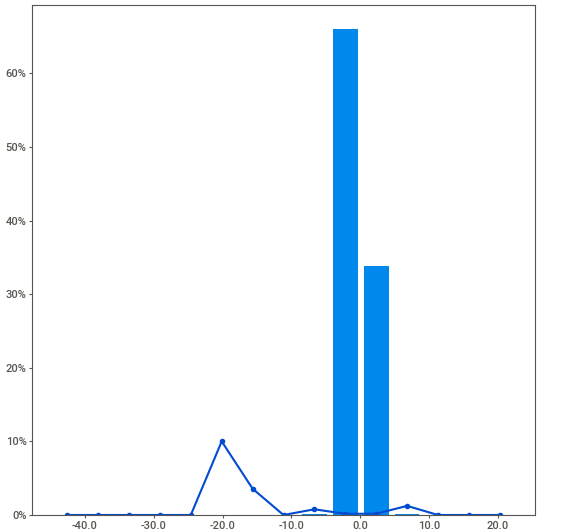
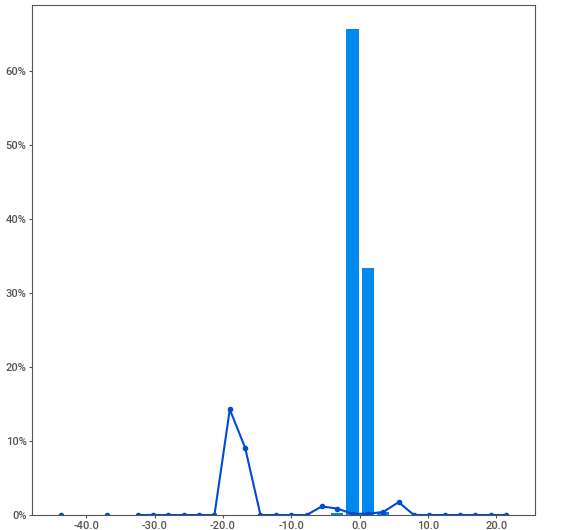
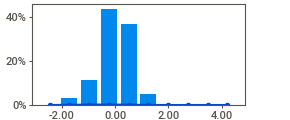
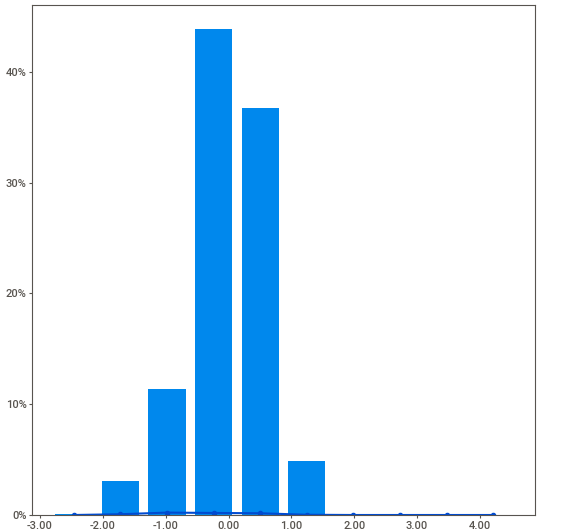
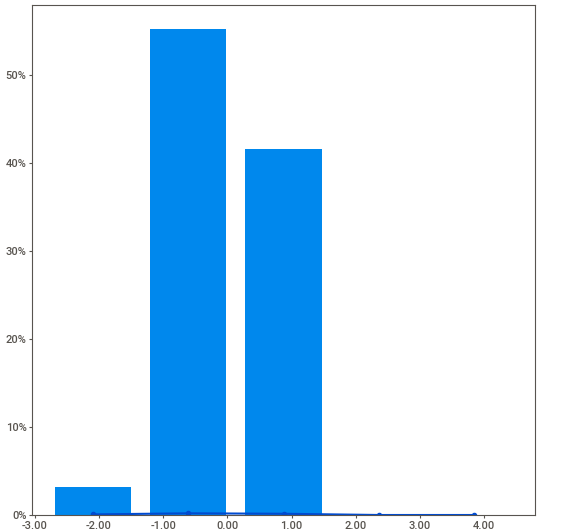
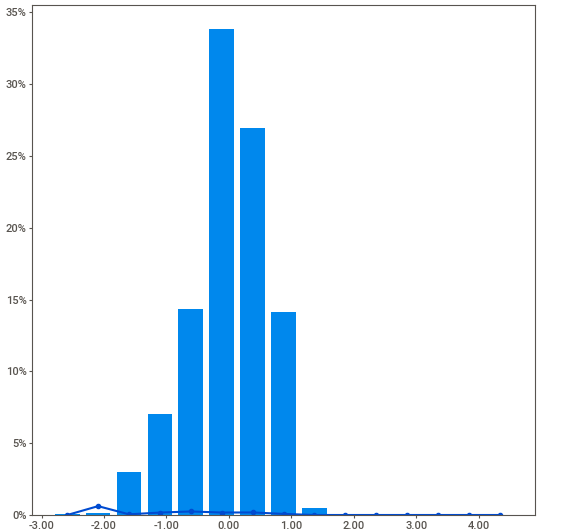
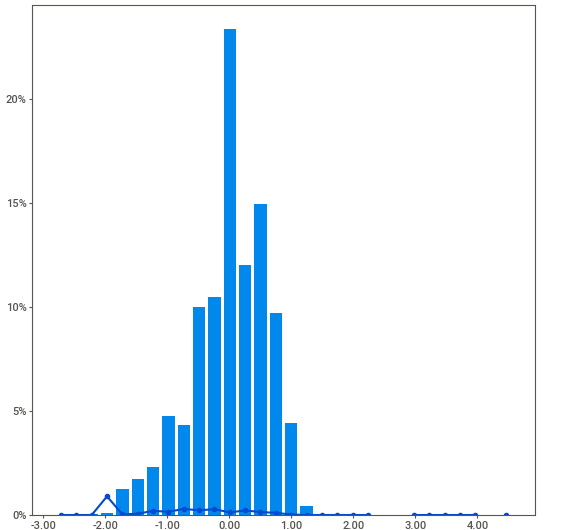
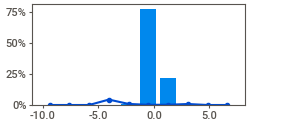
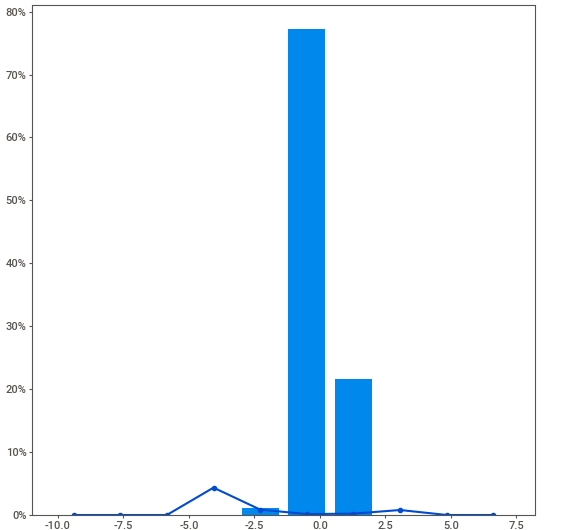
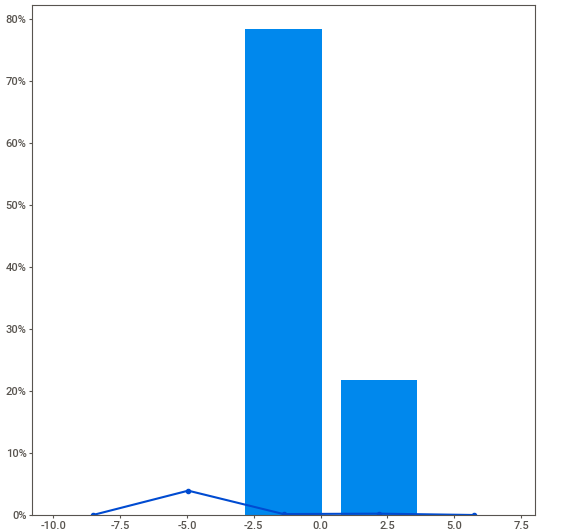
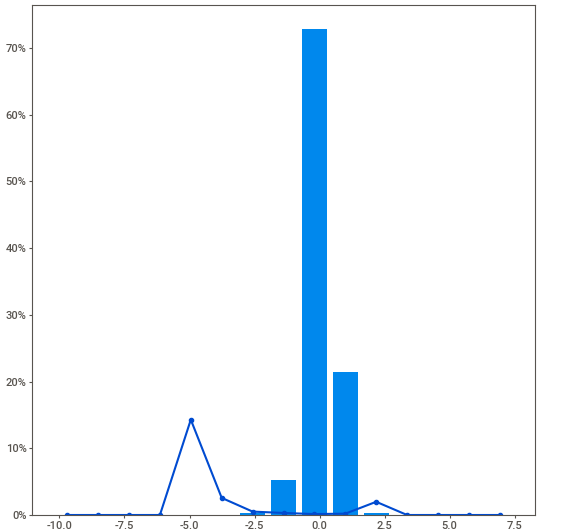
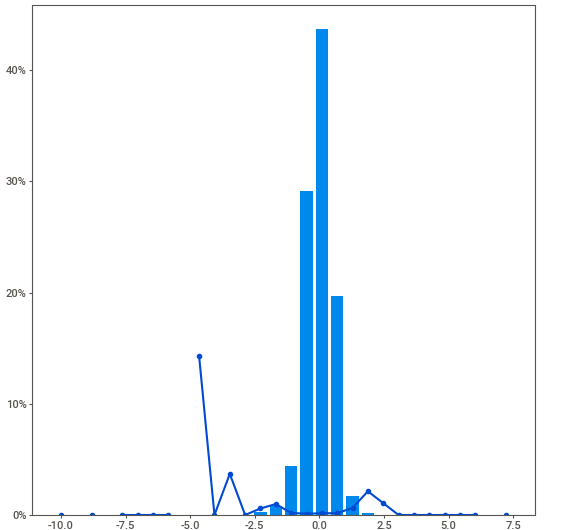
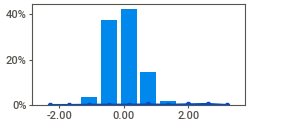
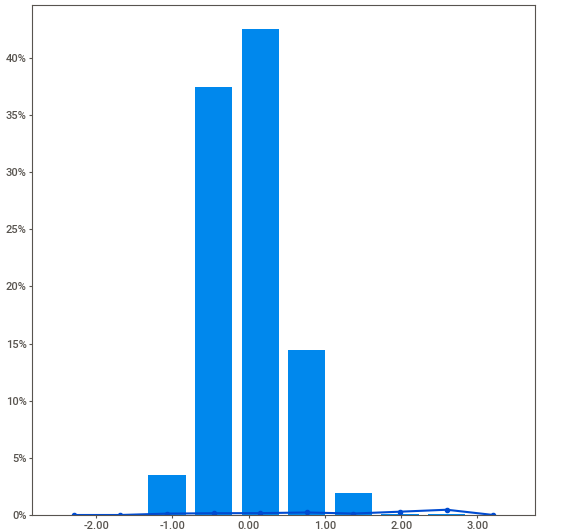
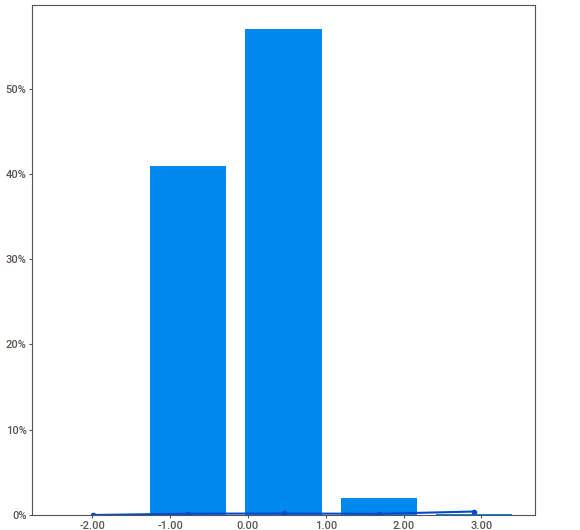
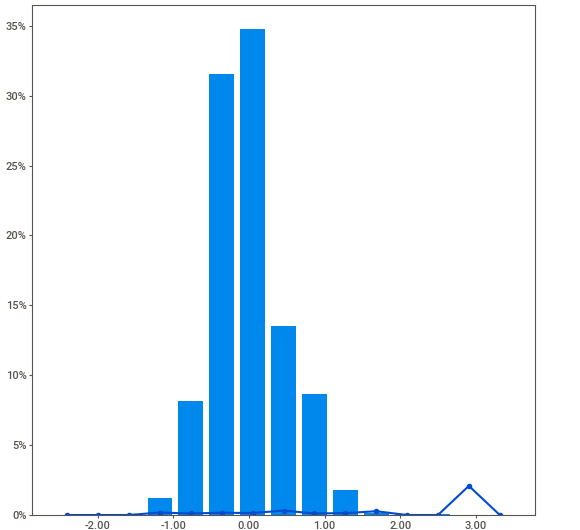
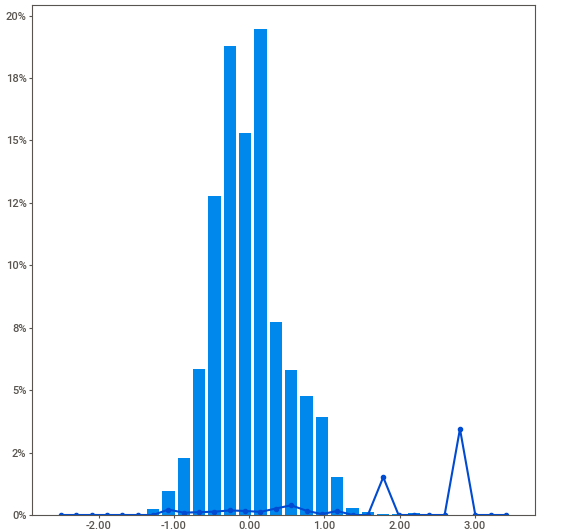
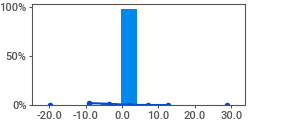
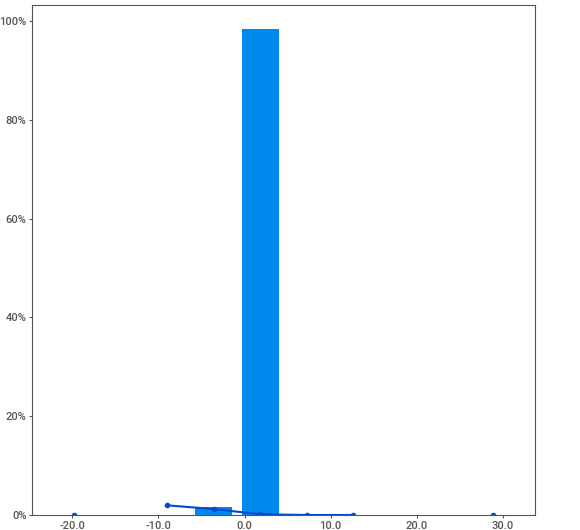
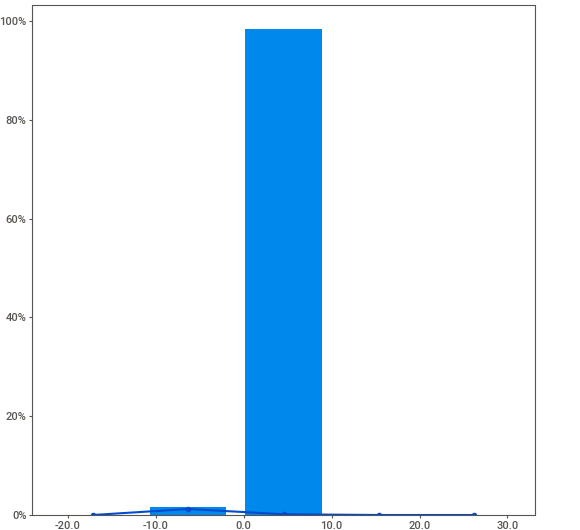
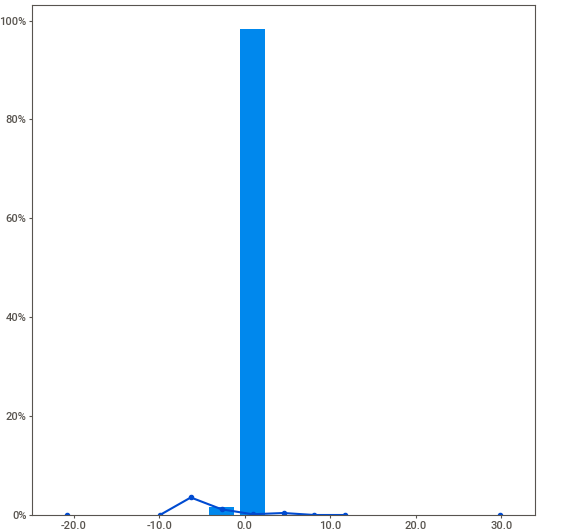
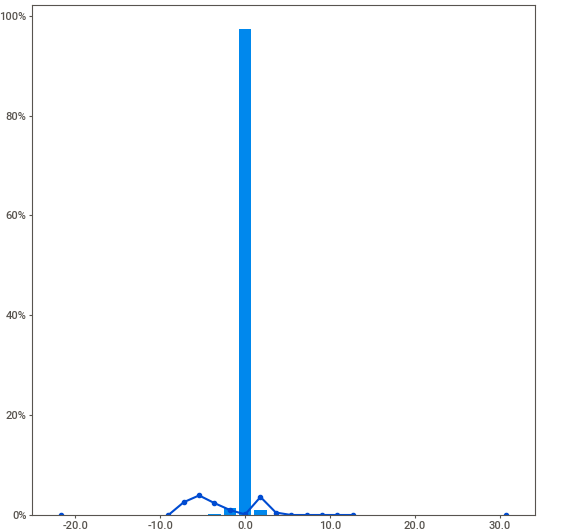
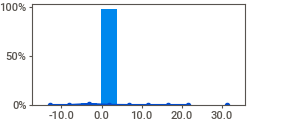
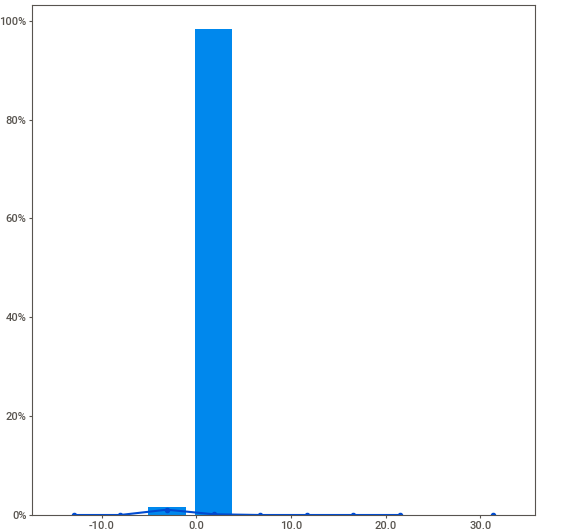
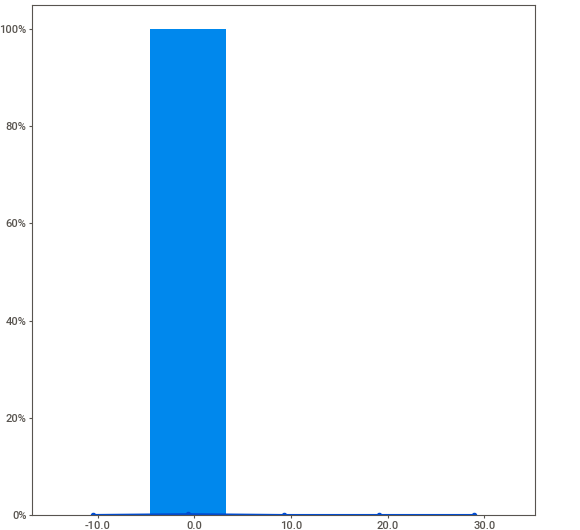
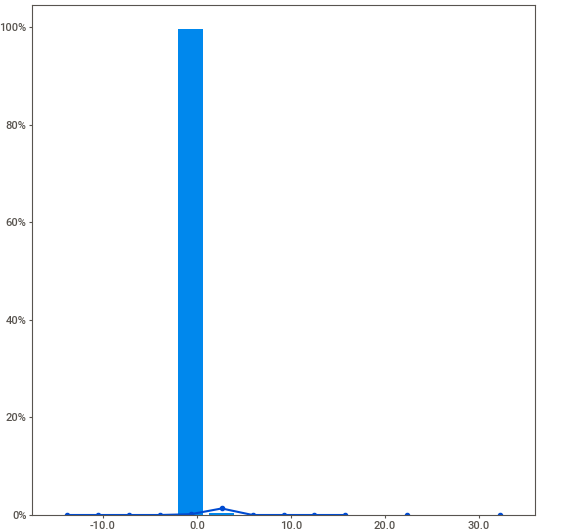
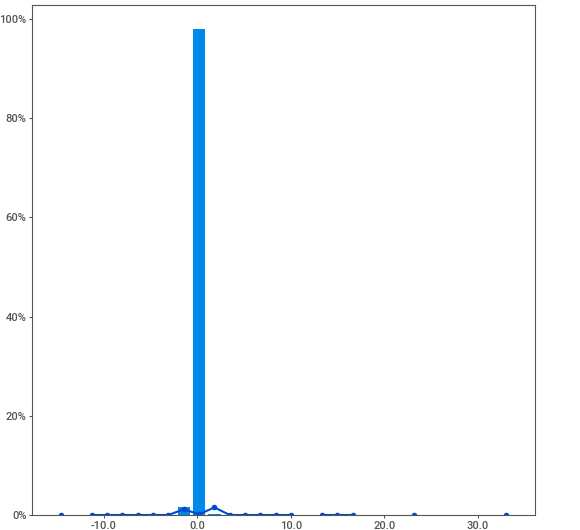
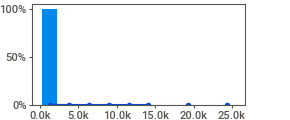
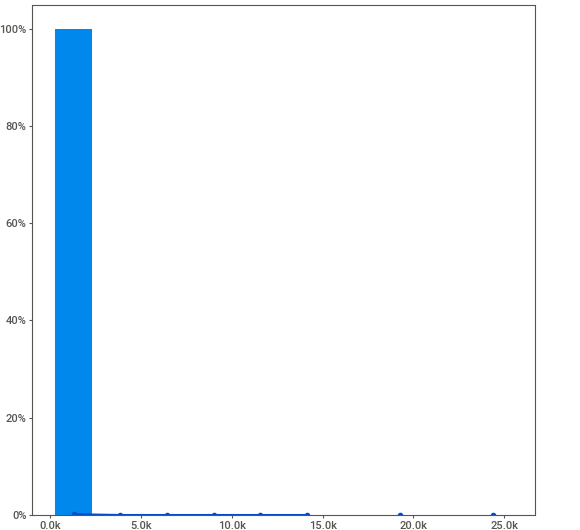
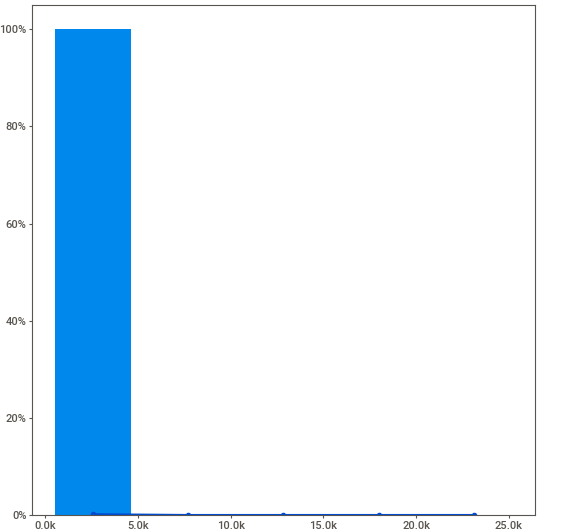
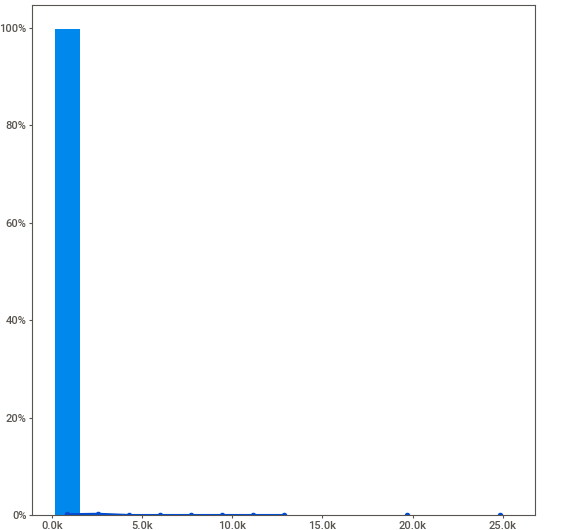
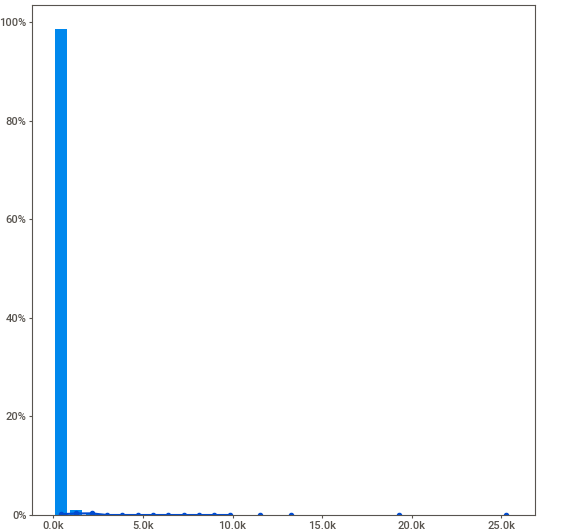
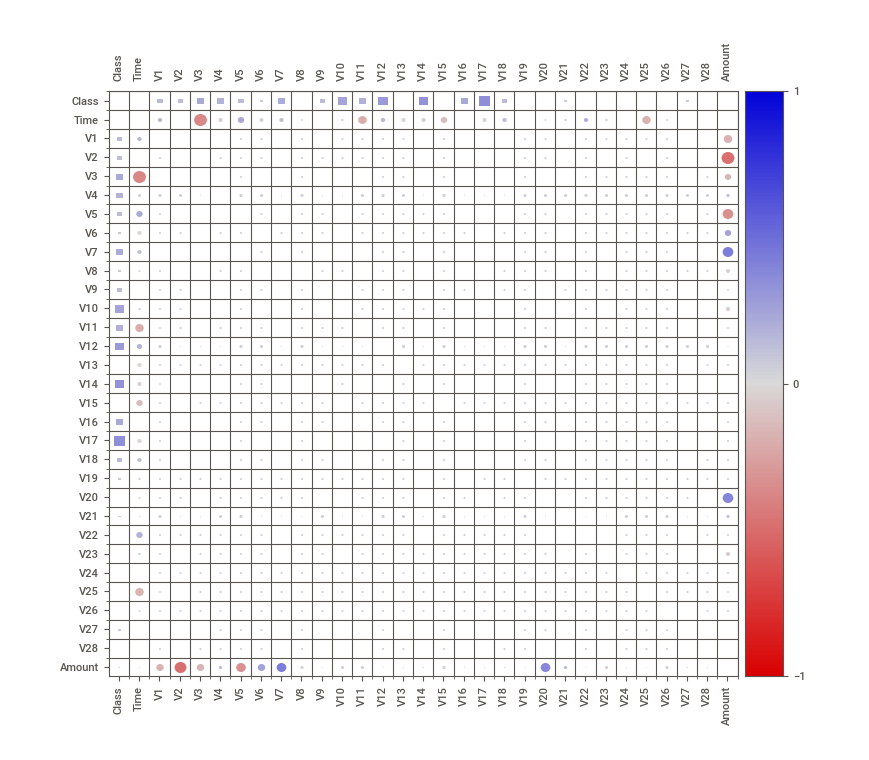
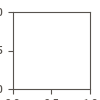

In [28]:
report.show_notebook()

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

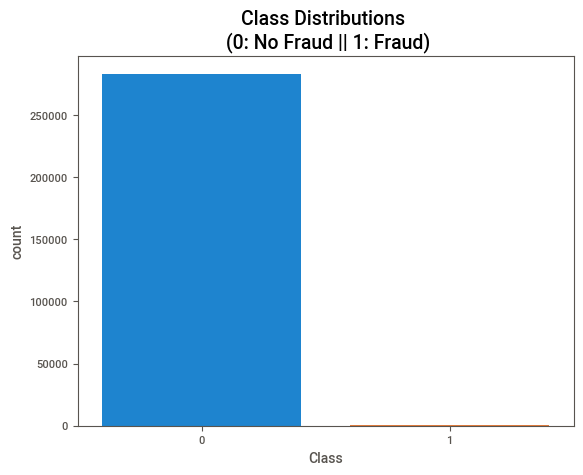

In [29]:
sns.countplot(x='Class',data = df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Text(0.5, 1.0, 'Logrithmic Bar Graph of 0 and 1 in Class Column ')

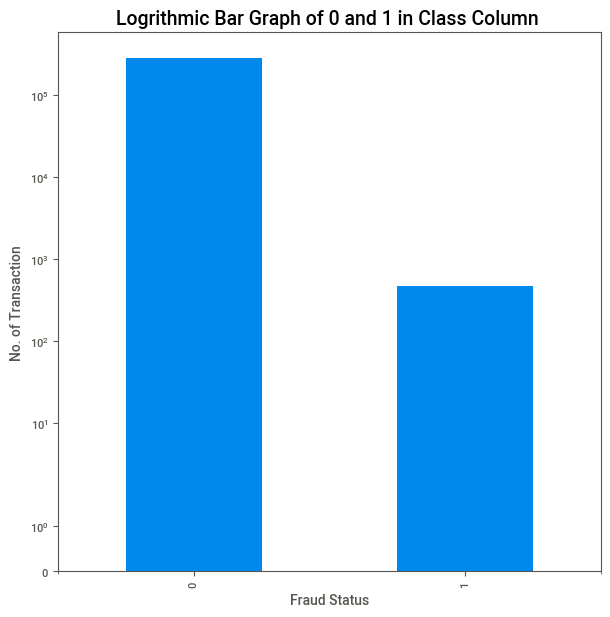

In [31]:
## For better representation we can plot these values on logrithmic scale

df.Class.value_counts().plot(kind='bar',  loglog = 'sym',figsize = (7,7),xlabel = 'Fraud Status',ylabel = 'No. of Transaction')
plt.title('Logrithmic Bar Graph of 0 and 1 in Class Column ', fontsize=14)

In [32]:
# Now we clearly see that this data is imbalanced

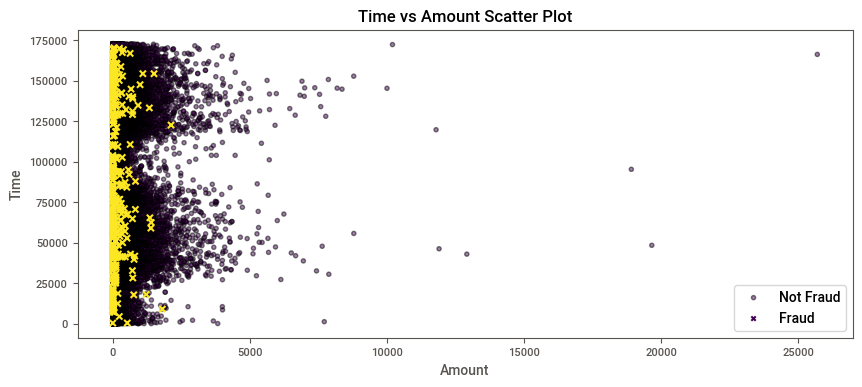

In [33]:
## Comparision of Time vs Amount

fig, ax = plt.subplots(figsize=(10,4))  
plt.scatter(df.Amount, df.Time, c=df.Class,alpha = 0.5,edgecolor='black',linewidth= 1, label = 'Not Fraud')
plt.scatter(df.Amount, df.Time, marker = 'x', s = 20*df.Class , c = df.Class, label = 'Fraud')
plt.title('Time vs Amount Scatter Plot')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.legend()
plt.show()

In [34]:
# maximum amount related to the fraud case is 2125.87 units

df.Amount[df.Class == 1].max()  

2125.87

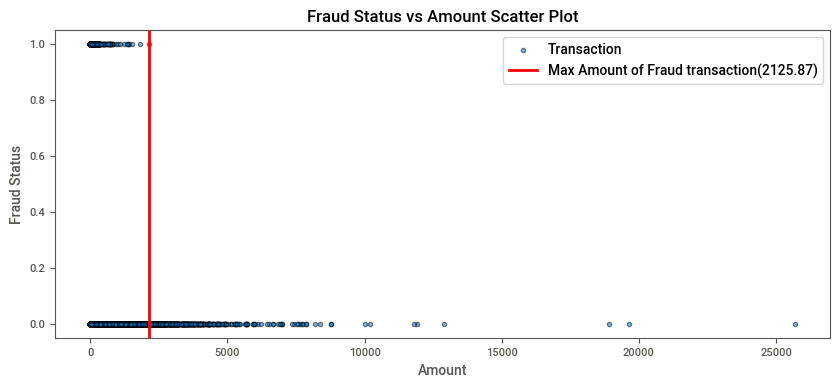

In [35]:
## Comparing the Fraud transaction vs Total transaction

fig, ax = plt.subplots(figsize=(10,4))  
plt.scatter(df.Amount, df.Class ,alpha = 0.5,edgecolor='black',linewidth= 1, label = 'Transaction')
plt.axvline(df.Amount[df.Class == 1].max(),linewidth = 2,c = 'red' ,label='Max Amount of Fraud transaction(2125.87)' )
plt.title('Fraud Status vs Amount Scatter Plot')
plt.xlabel('Amount')
plt.ylabel('Fraud Status')
plt.legend()
plt.show()

In [36]:
# Checking Time column with Fraud cases

df.Time[df.Class == 1].describe()

count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

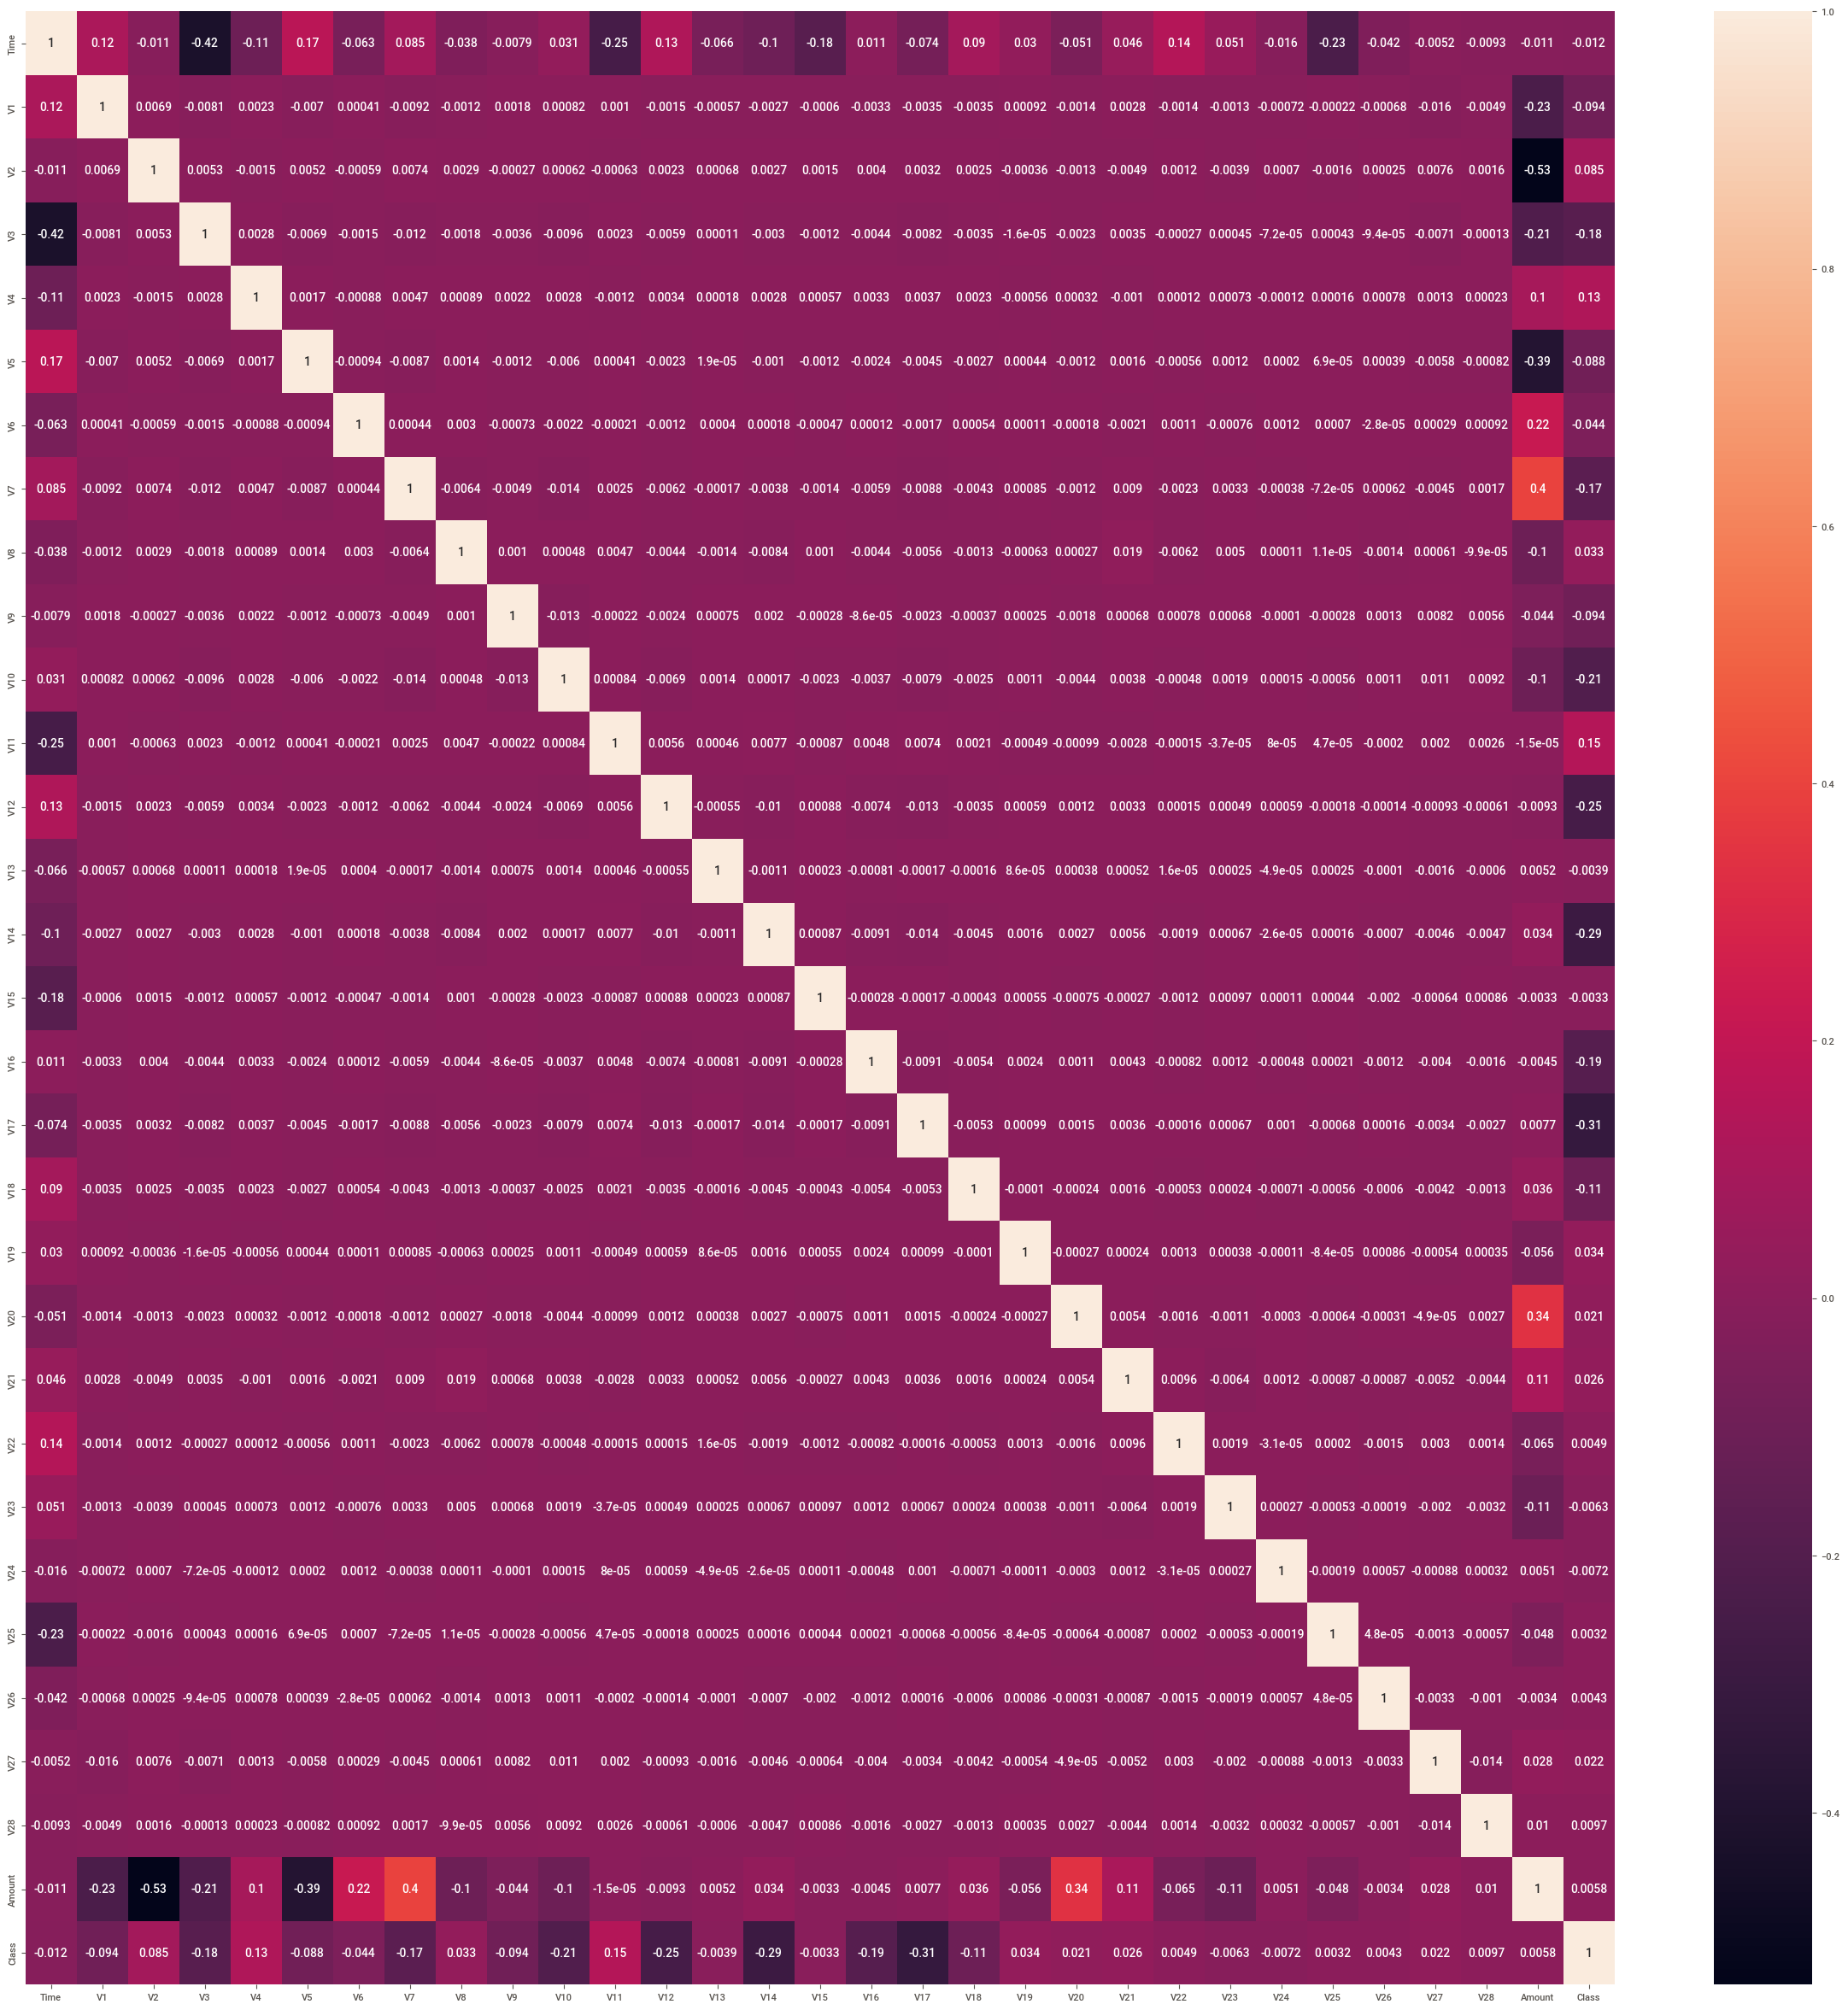

In [40]:
## Lets see the correlation between the features

cols = list(range(31))  # list of all features
fig, ax = plt.subplots(figsize=(30,30)) # defining the size and shape of the plot
corelation = df.iloc[:,cols].corr() 
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)
plt.savefig('Correlation matrix range all.png') # saving the plot

In [41]:
# we can see that there is very less correlation between main features

### 8) Splitting the data into Train and Test

In [42]:
# Selecting All columns except Class column 
X = df.iloc[:, df.columns != 'Class'].values 

# Selecting Only Class column as target variable
y = df.iloc[:, df.columns == 'Class'].values

In [43]:
# shape of X
X.shape 

(283726, 30)

In [44]:
# shape of y
y.shape

(283726, 1)

In [45]:
## Splitting into train and test with train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [46]:
# shape of X_train
X_train.shape 

(226980, 30)

In [47]:
# shape of X_test
X_test.shape 

(56746, 30)

In [48]:
# shape of y_train
y_train.shape 

(226980, 1)

In [49]:
# shape of y_test
y_test.shape 

(56746, 1)

### 9) Confusion Matrix 

In [51]:
## Creating a function to later plot with the help of confusion matrix.

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

### 10) Logistic Regression

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


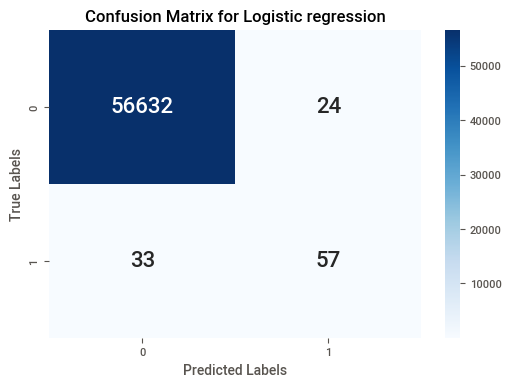

In [53]:
## Performing logistic regression using scikit-learn. 
## Makeing predictions on a test set, and plots the confusion matrix for evaluation.

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
predictions_logreg = logreg.predict(X_test)

plot_confusion_matrix(y_test, predictions_logreg, 'Logistic regression')

In [117]:
accuracy_score(y_test, predictions_logreg)

0.9989955239135798

### 11) Random Forest

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


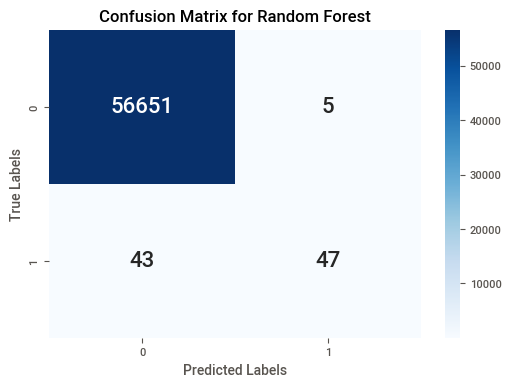

In [56]:
## Performing random forest using scikit-learn. 
## Makeing predictions on a test set, and plots the confusion matrix for evaluation.

rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)

plot_confusion_matrix(y_test, predictions_rf, 'Random Forest')

### 12) Decision Tree

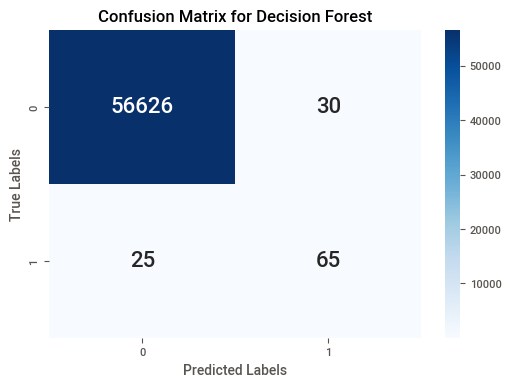

In [57]:
## Performing decision tree using scikit-learn. 
## Makeing predictions on a test set, and plots the confusion matrix for evaluation.

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)

plot_confusion_matrix(y_test, predictions_dt, 'Decision Forest')

### 13) Support Vector Machine (SVM)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


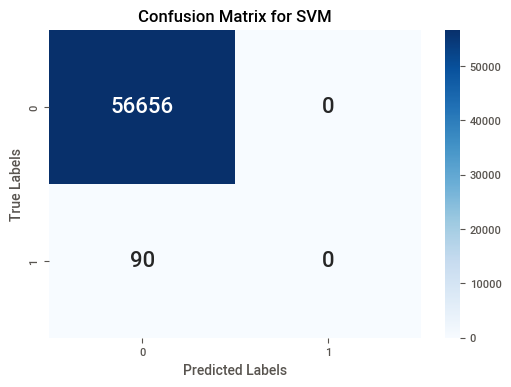

In [58]:
## Performing SVC using scikit-learn. 
## Makeing predictions on a test set, and plots the confusion matrix for evaluation.

svm = SVC()
svm.fit(X_train, y_train)
predictions_svm = svm.predict(X_test)

plot_confusion_matrix(y_test, predictions_svm, 'SVM')

### 14) Evaluating performance of the Models by using (Precision, Recall, F1-score, and AUC-ROC metrics)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


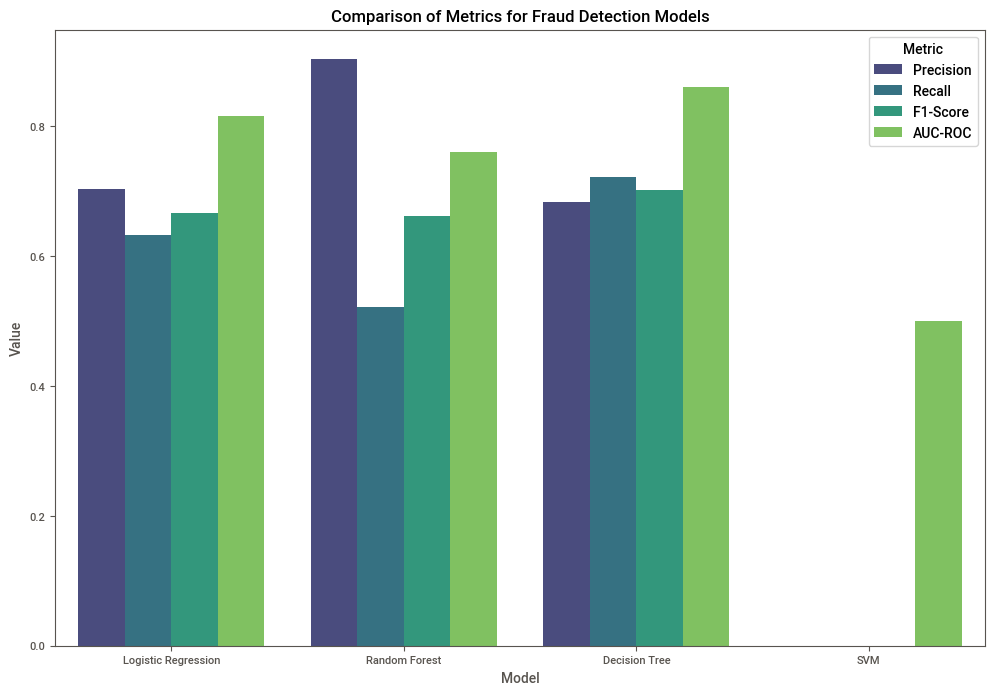

In [99]:

## Create a DataFrame for easier visualization

results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM'],
    'Precision': [precision_score(y_test, predictions_logreg),
                  precision_score(y_test, predictions_rf),
                  precision_score(y_test, predictions_dt),
                  precision_score(y_test, predictions_svm)],
    'Recall': [recall_score(y_test, predictions_logreg), recall_score(y_test, predictions_rf),
               recall_score(y_test, predictions_dt), recall_score(y_test, predictions_svm)],
    'F1-Score': [f1_score(y_test, predictions_logreg), f1_score(y_test, predictions_rf),
                 f1_score(y_test, predictions_dt), f1_score(y_test, predictions_svm)],
    'AUC-ROC': [roc_auc_score(y_test, predictions_logreg), roc_auc_score(y_test, predictions_rf),
                roc_auc_score(y_test, predictions_dt), roc_auc_score(y_test, predictions_svm)]
})


# Create a bar chart for precision, recall, F1-Score, AUC-ROC metrics

plt.figure(figsize=(12, 8))
metrics_df_melted = pd.melt(results_df, id_vars='Model', var_name='Metric', value_name='Value')
sns.barplot(data=metrics_df_melted, x='Model', y='Value', hue='Metric', palette='viridis')
plt.title('Comparison of Metrics for Fraud Detection Models')
plt.ylabel('Value')
plt.show()


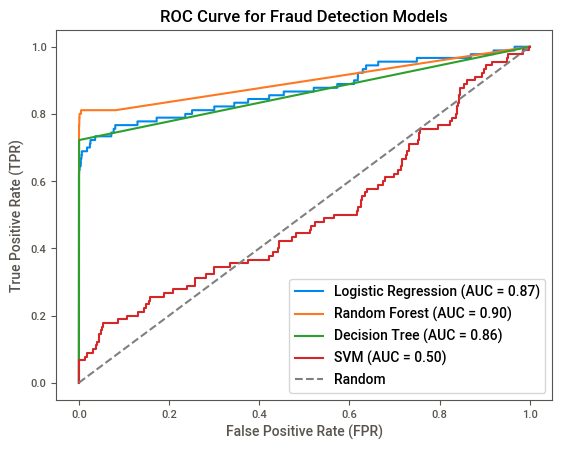

In [100]:
# Function to plot the ROC Curve
def plot_roc_curve(y_true, y_scores, label):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc_score(y_true, y_scores):.2f})')

# Add ROC Curves for each model
plot_roc_curve(y_test, logreg.predict_proba(X_test)[:, 1], 'Logistic Regression')
plot_roc_curve(y_test, rf.predict_proba(X_test)[:, 1], 'Random Forest')
plot_roc_curve(y_test, dt.predict_proba(X_test)[:, 1], 'Decision Tree')
plot_roc_curve(y_test, svm.decision_function(X_test), 'SVM')

# Layout adjustments
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Fraud Detection Models')
plt.legend()
plt.show()

In [108]:
# DataFrame to store metrics
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM'],
    'Precision': [precision_score(y_test, predictions_logreg),
                  precision_score(y_test, predictions_rf),
                  precision_score(y_test, predictions_dt),
                  precision_score(y_test, predictions_svm)],
    'Recall': [recall_score(y_test, predictions_logreg), recall_score(y_test, predictions_rf),
               recall_score(y_test, predictions_dt), recall_score(y_test, predictions_svm)],
    'F1-Score': [f1_score(y_test, predictions_logreg), f1_score(y_test, predictions_rf),
                 f1_score(y_test, predictions_dt), f1_score(y_test, predictions_svm)],
    'AUC-ROC': [roc_auc_score(y_test, predictions_logreg), roc_auc_score(y_test, predictions_rf),
                roc_auc_score(y_test, predictions_dt), roc_auc_score(y_test, predictions_svm)]
})

# Display the metrics DataFrame
print(metrics_df)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 Model  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression   0.703704  0.633333  0.666667  0.816455
1        Random Forest   0.903846  0.522222  0.661972  0.761067
2        Decision Tree   0.684211  0.722222  0.702703  0.860846
3                  SVM   0.000000  0.000000  0.000000  0.500000


In [110]:
# Determine the best model based on a specific metric
best_model_auc = metrics_df.loc[metrics_df['AUC-ROC'].idxmax()]
best_model_precision = metrics_df.loc[metrics_df['Precision'].idxmax()]
best_model_recall = metrics_df.loc[metrics_df['Recall'].idxmax()]
best_model_f1 = metrics_df.loc[metrics_df['F1-Score'].idxmax()]

In [111]:
print("\nBest Model (AUC-ROC):")
print(best_model_auc)


Best Model (AUC-ROC):
Model        Decision Tree
Precision         0.684211
Recall            0.722222
F1-Score          0.702703
AUC-ROC           0.860846
Name: 2, dtype: object


In [112]:
print("\nBest Model (Precision):")
print(best_model_precision)


Best Model (Precision):
Model        Random Forest
Precision         0.903846
Recall            0.522222
F1-Score          0.661972
AUC-ROC           0.761067
Name: 1, dtype: object


In [113]:
print("\nBest Model (Recall):")
print(best_model_recall)


Best Model (Recall):
Model        Decision Tree
Precision         0.684211
Recall            0.722222
F1-Score          0.702703
AUC-ROC           0.860846
Name: 2, dtype: object


In [114]:
print("\nBest Model (F1-Score):")
print(best_model_f1)


Best Model (F1-Score):
Model        Decision Tree
Precision         0.684211
Recall            0.722222
F1-Score          0.702703
AUC-ROC           0.860846
Name: 2, dtype: object


In [119]:
Accuracy_score_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM'],
    'Precision': [accuracy_score(y_test, predictions_logreg),
                  accuracy_score(y_test, predictions_rf),
                  accuracy_score(y_test, predictions_dt),
                  accuracy_score(y_test, predictions_svm)]})

In [120]:
print(Accuracy_score_df)

                 Model  Precision
0  Logistic Regression   0.998996
1        Random Forest   0.999154
2        Decision Tree   0.999031
3                  SVM   0.998414


In conclusion, 

the analysis identifies the Random Forest model as the best performer based on the Precision metric. 
With an Precision of 0.903846 / Recall of 0.522222 / F1-Score of 0.661972 / AUC-ROC of 0.761067.

Also Decision tree is equally good at its performance.

### 15) XGBoost Classifier

In [130]:
## Default Xgboost Classifier model

# for tracking time
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [131]:
# Xgboost model
from xgboost import XGBClassifier
classifier = XGBClassifier()

from datetime import datetime

# timing starts from this point for "start_time" variable
start_time = timer(None) 

classifier.fit(X_train, y_train.ravel())

# timing ends here for "start_time" variable
timer(start_time) 


 Time taken: 0 hours 0 minutes and 5.56 seconds.


In [133]:
# an error is prevented by replacing y_train with y_train.ravel() [it converts that array shape to (n, )]

X_test prediction on default hyperparameters

In [134]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[56653     3]
 [   25    65]]


0.9995065731505305

In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.96      0.72      0.82        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



X set Prediction on default hyperparameters

In [136]:
y_pred = classifier.predict(X)
cm = confusion_matrix(y, y_pred)
print(cm)
accuracy_score(y, y_pred)

[[283250      3]
 [    25    448]]


0.999901313238829

In [137]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.99      0.95      0.97       473

    accuracy                           1.00    283726
   macro avg       1.00      0.97      0.98    283726
weighted avg       1.00      1.00      1.00    283726



### 16) Hyperparameters tuning with GridSearchCV

In [138]:
params={
 "learning_rate"    : [0.05,0.1, 0.3] ,
 "max_depth"        : [ 12, 15]   
}

In [139]:
grid_search= GridSearchCV(estimator = classifier,param_grid=params,scoring='f1',n_jobs=-1,cv=5)

In [140]:
# timing starts from this point for "start_time" variable
start_time = timer(None) 

grid_search.fit(X_train,y_train.ravel())

# timing ends here for "start_time" variable
timer(start_time) 


 Time taken: 0 hours 0 minutes and 36.78 seconds.


In [141]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [142]:
accuracy = grid_search.best_score_
accuracy

0.8595363294441871

In [154]:
grid_tuned_classifier = XGBClassifier(base_score=None, booster=None, callbacks=None,
                                      colsample_bylevel=None, colsample_bynode=None,
                                      colsample_bytree=None, device=None, early_stopping_rounds=None,
                                      enable_categorical=False, eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None, importance_type=None,
                                      interaction_constraints=None, learning_rate=0.1, max_bin=None,
                                      max_cat_threshold=None, max_cat_to_onehot=None,
                                      max_delta_step=None, max_depth=12, max_leaves=None,
                                      min_child_weight=None, missing=0, monotone_constraints=None,
                                      multi_strategy=None, n_estimators=None, n_jobs=None,
                                      num_parallel_tree=None, random_state=None)

X_test set prediction

In [155]:
grid_tuned_classifier.fit(X_train, y_train.ravel())
y_pred = grid_tuned_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy on X_test set ',accuracy_score(y_test, y_pred))

[[56653     3]
 [   25    65]]
Accuracy on X_test set  0.9995065731505305


In [156]:
print('Classification report on X_test set\n',classification_report(y_test,y_pred))

Classification report on X_test set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.96      0.72      0.82        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



X set prediction

In [157]:
y_pred = grid_tuned_classifier.predict(X)
cm = confusion_matrix(y, y_pred)
print(cm)
print('Accuracy on whole X set ',accuracy_score(y, y_pred))

[[283250      3]
 [    33    440]]
Accuracy on whole X set  0.9998731170213516


In [158]:
print('Classification report on whole X set\n',classification_report(y,y_pred))

Classification report on whole X set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.99      0.93      0.96       473

    accuracy                           1.00    283726
   macro avg       1.00      0.97      0.98    283726
weighted avg       1.00      1.00      1.00    283726



### 17) Hyperparameter tuning with RandomizedSearchCV

In [159]:
params={
 "learning_rate"    : [0.05, 0.1, 0.2, 0.3, 1 ] ,
 "max_depth"        : [10, 12, 15],
 "min_child_weight" : [ 1, 3 ],
 "gamma"            : [ 0.0, 0.15, 0.3]   
}

In [163]:
random_search= RandomizedSearchCV(estimator = classifier,param_distributions=params,
                                  n_iter=10,
                                  scoring='f1',
                                  n_jobs=-1,
                                  cv=5,
                                  verbose=0,
                                  pre_dispatch='2*n_jobs',
                                  random_state=None,
                                  return_train_score=False)

In [164]:
# timing starts from this point for "start_time" variable
start_time = timer(None) 

random_search.fit(X_train,y_train.ravel())

# timing ends here for "start_time" variable
timer(start_time) 


 Time taken: 0 hours 0 minutes and 40.66 seconds.


In [165]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [166]:
random_search.best_params_

{'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.3, 'gamma': 0.3}

In [167]:
random_tuned_classifier = XGBClassifier(base_score=None, booster=None, callbacks=None,
                                        colsample_bylevel=None, colsample_bynode=None,
                                        colsample_bytree=None, device=None, early_stopping_rounds=None,
                                        enable_categorical=False, eval_metric=None, feature_types=None,
                                        gamma=0.3, grow_policy=None, importance_type=None,
                                        interaction_constraints=None, learning_rate=0.3, max_bin=None,
                                        max_cat_threshold=None, max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=10, max_leaves=None,
                                        min_child_weight=1, missing=0, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=None, n_jobs=None,
                                        num_parallel_tree=None, random_state=None,
                                        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                                        tree_method='exact', validate_parameters=1, verbosity=None)

X_test set prediction

In [168]:
random_tuned_classifier.fit(X_train, y_train.ravel())
y_pred = random_tuned_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy on X_test set ',accuracy_score(y_test, y_pred))

[[56655     1]
 [   27    63]]
Accuracy on X_test set  0.9995065731505305


In [169]:
print('Classification report of X_test set',classification_report(y_test,y_pred))

Classification report of X_test set               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.98      0.70      0.82        90

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746



Whole X set prediction

In [170]:
y_pred = random_tuned_classifier.predict(X)
cm = confusion_matrix(y, y_pred)
print(cm)
print('Accuracy on whole X set',accuracy_score(y, y_pred))

[[283252      1]
 [    27    446]]
Accuracy on whole X set 0.999901313238829


In [171]:
print('Classification report on whole X set',classification_report(y,y_pred))

Classification report on whole X set               precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       1.00      0.94      0.97       473

    accuracy                           1.00    283726
   macro avg       1.00      0.97      0.98    283726
weighted avg       1.00      1.00      1.00    283726



## Conclusion

In [187]:
conclusion = pd.read_csv('conclusion.csv')

In [188]:
conclusion

model  xtest_precision  xtest_recall  xtest_f1score  \
0               default             0.96          0.72           0.82   
1        grid_search_cv             0.96          0.72           0.82   
2  randomized_search_cv             0.98          0.70           0.82   

   xtest_true_negative  xtest_false_negative  xtest_false_positive  \
0                56653                     3                    25   
1                56653                     3                    25   
2                56655                     1                    27   

   xtest_true_positive  X_test_accuracy  x_precision  x_recall  x_f1score  \
0                   65          0.99951         0.99      0.95       0.97   
1                   65          0.99951         0.99      0.93       0.96   
2                   63          0.99950         1.00      0.94       0.97   

   x_true_negative  x_false_negative  x_false_positive  x_true_positive  \
0           283250                 3                25              448   
1           283250                 3                33              440   
2           283252                 1                27              446   

   X_accuracy  
0     0.99901  
1     0.99987  
2     0.99990

In [189]:
conclusion.columns

Index(['model', 'xtest_precision', 'xtest_recall', 'xtest_f1score',
       'xtest_true_negative', 'xtest_false_negative', 'xtest_false_positive',
       'xtest_true_positive', 'X_test_accuracy', 'x_precision', 'x_recall',
       'x_f1score', 'x_true_negative', 'x_false_negative', 'x_false_positive',
       'x_true_positive', 'X_accuracy'],
      dtype='object')

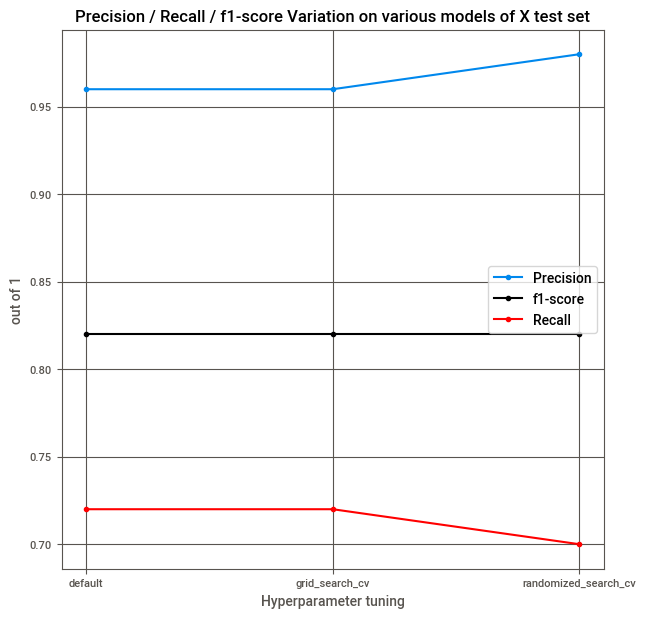

In [191]:
# Precision / Recall / f1-score Variation on various models of xtest set

fig, ax = plt.subplots(figsize=(7,7))
plt.plot(conclusion.model,conclusion.xtest_precision, label = 'Precision', marker = 'o')
plt.plot(conclusion.model,conclusion.xtest_f1score, label = 'f1-score', c = 'Black', marker = 'o')
plt.plot(conclusion.model,conclusion.xtest_recall, label = 'Recall', c = 'Red', marker = 'o')
plt.title('Precision / Recall / f1-score Variation on various models of X test set')
plt.grid()
plt.xlabel('Hyperparameter tuning')
plt.ylabel('out of 1')
plt.legend()
plt.show()

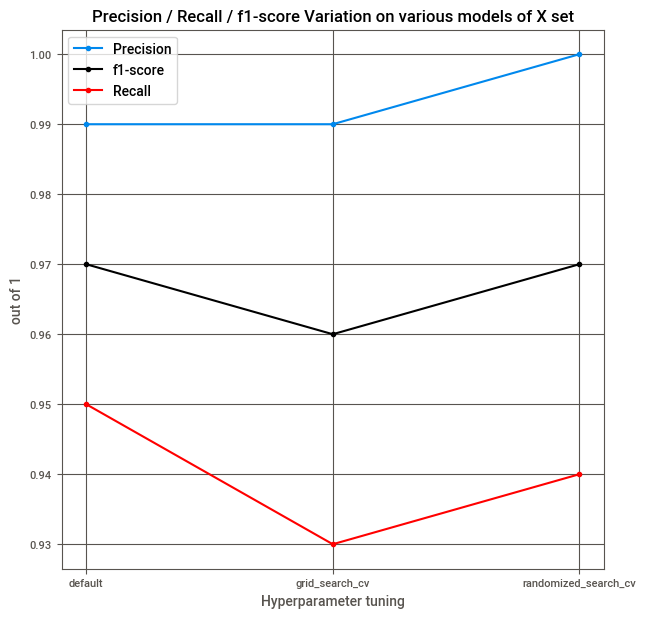

In [192]:
# Precision / Recall / f1-score Variation on various models of X set

fig, ax = plt.subplots(figsize=(7,7))
plt.plot(conclusion.model,conclusion.x_precision, label = 'Precision', marker = 'o')
plt.plot(conclusion.model,conclusion.x_f1score	, label = 'f1-score', c = 'Black', marker = 'o')
plt.plot(conclusion.model,conclusion.x_recall, label = 'Recall', c = 'Red', marker = 'o')
plt.title('Precision / Recall / f1-score Variation on various models of X set')
plt.grid()
plt.xlabel('Hyperparameter tuning')
plt.ylabel('out of 1')
plt.legend()
plt.show()

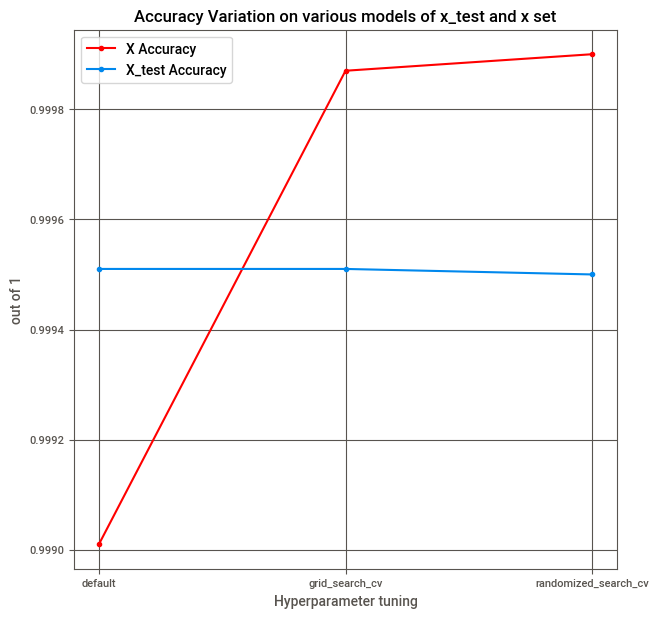

In [193]:
# Accuracy Variation on various models of x_test and x set

fig, ax = plt.subplots(figsize=(7,7))
plt.plot(conclusion.model,conclusion.X_accuracy, label = 'X Accuracy', c = 'Red', marker = 'o')
plt.plot(conclusion.model,conclusion.X_test_accuracy, label = 'X_test Accuracy', marker = 'o')
plt.title('Accuracy Variation on various models of x_test and x set')
plt.grid()
plt.xlabel('Hyperparameter tuning')
plt.ylabel('out of 1')
plt.legend()
plt.show()

Conclusion-

1) Randomized Search CV approach of Hyperparameter tuning gave better results but in more time (with 13 parameters distribution). 

2) Grid Search CV takes more time and computation power when grid is bigger, so I used only 5 numbers of parameters in parameter grid. Although Randomized Search CV took more time but it covers more parameters.

3) RandomizedSearchCV gives good results as precision is 0.98 which is achieved by Hyperparameter tuning on X_test set.
